# Automatic Ticket Assignment

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no
impact to the Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business.

Manual assignment of incidents is time consuming and requires human efforts. There may be
mistakes due to human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

# Goal

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text.



# Data source

Details about the data and dataset files are given in below link,
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

#Notebook

This notebook will explain about EDA and Data cleaning for the project

# Connecting to google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import string
import re

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

#nlp libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from wordcloud import WordCloud, STOPWORDS 
#pip install googletrans
#from googletrans import Translator

from email.parser import Parser
from email.policy import default

# Importing Spacy
import spacy
nlp=spacy.load("en_core_web_sm")

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


import collections
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPooling1D, SimpleRNN,SpatialDropout1D,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.initializers import Constant

from sklearn import metrics
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics c
from sklearn.model_selection import StratifiedShuffleSplit

from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import SMOTE 

import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from bokeh.io import output_notebook
from bokeh.plotting import show, figure




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
pip install spacy && python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


#Loading Data

In [0]:

mydata = pd.read_excel('/content/drive/My Drive/Capston_Dataset/Input Data Synthetic (created but not used in our project).xlsx', lines=True)
#mydata = pd.read_excel('/content/drive/My Drive/Input Data Synthetic (created but not used in our project).xlsx', lines=True)
mydata.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
mydata.shape

(8500, 4)

In [0]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
# Finding number of null in each column
mydata.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

- The data looks good at first glance. 
- There are 8500 records in total.
- Few values are missing in Short description column and Description column. 
- Values in Caller and Assignment group looks ok with no missing value. 
- All has object data type

# Renaming column names to standard format

In [0]:
mydata.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [0]:
#Removing space from column names
mydata.rename(columns={'Short description':'Short_description','Assignment group':'Assignment_group'}, inplace=True)

In [0]:
mydata.columns

Index(['Short_description', 'Description', 'Caller', 'Assignment_group'], dtype='object')

In [0]:
mydata.head()

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Looking into top values

In [0]:
mydata.describe().T

,count,unique,top,freq
Short_description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment_group,8500,74,GRP_0,3976



**Short_description and Description:**

- Out of 8500 records, there are 7481 unique Short_description and 7817 unique descriptions meaning that there are many issues which are repeating. 

- this looks suspiscious as there may be duplicate records.Let us analyze further to confirm that.

**Caller:**

- only 2950 unique callers are present. so number of tickets to number of users is in the ration 3:1

- one single user (bpctwhsn kzqsbmtp) has created 810 tickets.

**Assignment_group:**

- There are totally 74 unique records. So the problem statement is a **multinomial classification**

- GRP_0 has 3976 records (nearly 50 percent of the records). Clearly indicating **Class imbalance**

In [0]:
#Let us look at the combination of the high frequency data
mydata[(mydata['Short_description']=='password reset') & (mydata['Assignment_group']=='GRP_0')].count()

Short_description    38
Description          38
Caller               38
Assignment_group     38
dtype: int64



All the 38 'password reset' problem are belonging to the same group GRP_0

# Analyzing Assignment_group column

In [0]:
mydata['Assignment_group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are 74 unique groups are named as GRP_0 to GRP_73

# Looking into Individual Assignment_group

In [0]:
mydata.query('Assignment_group == "GRP_0"')

,Short_description,Description,Caller,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8488,erp account unlock,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,rbozivdq gmlhrtvp,GRP_0
8489,account locked,account locked,sdvlxbfe ptnahjkw,GRP_0
8492,hr_tool etime option not visitble,hr_tool etime option not visitble,tmopbken ibzougsd,GRP_0
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0


No particular pattern for GRP_1

In [0]:
mydata[(mydata['Assignment_group'] == "GRP_8")]

,Short_description,Description,Caller,Assignment_group
50,job mm_zscr0099_dly_merktc3 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
59,job mm_zscr0099_dly_merktc2 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
60,job Job_3181 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
64,apac company : two switches are down since 3.4...,apac company : two switches are down since 3.4...,utyeofsk rdyzpwhi,GRP_8
68,job Job_1854 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
8442,abended job in job_scheduler: Job_481,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_8
8448,abended job in job_scheduler: Job_483,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_8
8461,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,uvrbhlnt bjrmalzi,GRP_8
8466,abended job in job_scheduler: bkwin_HostName_7...,received from: monitoring_tool@company.com\r\n...,ZkBogxib QsEJzdZO,GRP_8


Many mails are from monitoring_tool@company.com

In [0]:
mydata[(mydata['Assignment_group'] == "GRP_73")]

,Short_description,Description,Caller,Assignment_group
8197,oneteam sso not working,i'm unable to log in to hr_tool/oneteam throug...,kcnosyae zlpmfxgs,GRP_73


In [0]:
mydata[(mydata['Assignment_group'] == "GRP_72")]

,Short_description,Description,Caller,Assignment_group
7828,account locked.,account locked.,ydigzqbu xdgjizek,GRP_72
8387,ticket (ticket_no1538972) update to anftgup nf...,ticket (ticket_no1538972) update to anftgup nf...,fumkcsji sarmtlhy,GRP_72


In [0]:
mydata[(mydata['Assignment_group'] == "GRP_71")]

,Short_description,Description,Caller,Assignment_group
7597,na production files not received,\r\n\r\nreceived from: rdfjsawg.zpmxgdcw@gmail...,rdfjsawg zpmxgdcw,GRP_71
8099,emea files not processed as per schedule - che...,"hi pradtheyp,\r\n\r\nwe have not received the ...",rdfjsawg zpmxgdcw,GRP_71


In [0]:
mydata[(mydata['Assignment_group'] == "GRP_70")]

,Short_description,Description,Caller,Assignment_group
6401,"a link on an e-mail says i am ""forbidden""",an e-mail from it training has email hints an...,mfvkxghn mzjasxqd,GRP_70


In [0]:
# Group by Assignment_group
mydata_Group = mydata.groupby('Assignment_group')

In [0]:
# Summary stats over Assignment_group
mydata_Group.describe().head()

Short_description         ...             Caller     
                             count unique  ...                top freq
Assignment_group                           ...                        
GRP_0                         3969   3201  ...  fumkcsji sarmtlhy  132
GRP_1                           31     31  ...  bpctwhsn kzqsbmtp    6
GRP_10                         140    138  ...  bpctwhsn kzqsbmtp   60
GRP_11                          30     30  ...  ctvaejbo mjcerqwo    7
GRP_12                         257    252  ...  oldrctiu bxurpsyi   13

[5 rows x 12 columns]

In [0]:
list(mydata_Group)

[('GRP_0',
                                        Short_description  ... Assignment_group
  0                                           login issue  ...            GRP_0
  1                                               outlook  ...            GRP_0
  2                                    cant log in to vpn  ...            GRP_0
  3                         unable to access hr_tool page  ...            GRP_0
  4                                          skype error   ...            GRP_0
  ...                                                 ...  ...              ...
  8488                                 erp account unlock  ...            GRP_0
  8489                                     account locked  ...            GRP_0
  8492                 hr_tool etime option not visitble   ...            GRP_0
  8496                           telephony_software issue  ...            GRP_0
  8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
  
  [3976 rows x 4 columns])

Looking into the data from various assignment groups, we find that :

- there are many special characters (example :è½¬å‘: ç”³è¯·é€€æ¢è´§ï¼Œè´¨é‡) especailly GRP 48, 30, 31,62.
- Few groups contain german words
- Many data are in email format
- Many email ids and email headers are found.
- Many numbers and dates are found
- some groups can be clearly differentiated. For example , Group17 is mostly about reset password, Group 68 is about expense report, Group 66 is about cutview

# Assignment Groups Distribution

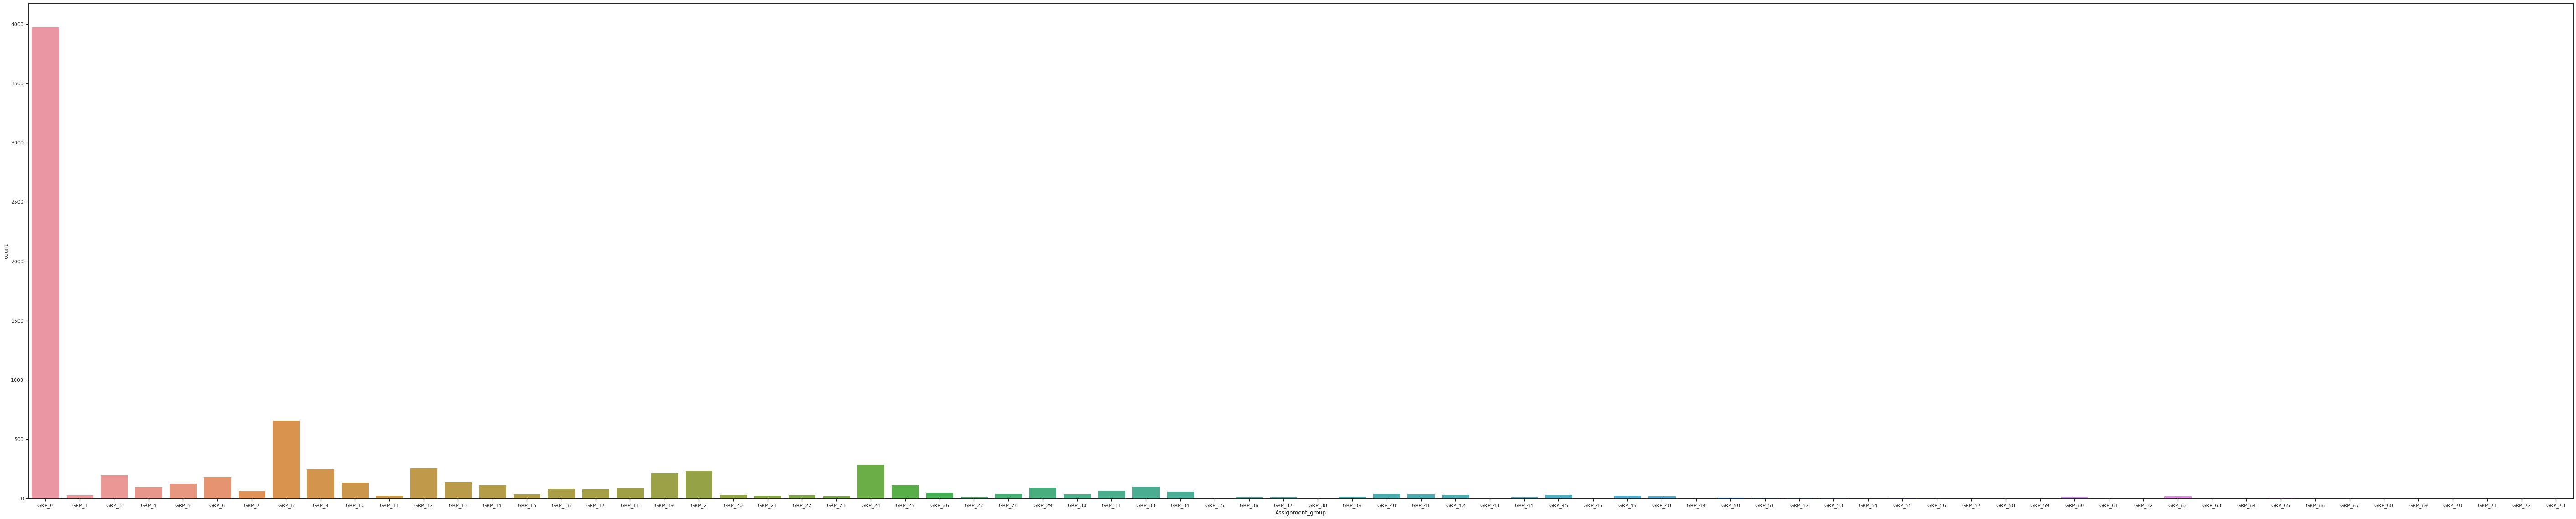

In [0]:
plt.figure(figsize=(100,20))
sns.countplot(x = mydata['Assignment_group'])

From the plot, it is clearly seen that the data is not uniformly distributed between classes.

A major class imbalance problem will occur in this data.



In [0]:
count = mydata['Assignment_group'].value_counts()

In [0]:
count.head(20)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
Name: Assignment_group, dtype: int64

In [0]:
count.tail(30)

GRP_36    15
GRP_44    15
GRP_50    14
GRP_53    11
GRP_65    11
GRP_52     9
GRP_51     8
GRP_55     8
GRP_46     6
GRP_49     6
GRP_59     6
GRP_43     5
GRP_32     4
GRP_66     4
GRP_38     3
GRP_56     3
GRP_58     3
GRP_68     3
GRP_63     3
GRP_57     2
GRP_72     2
GRP_69     2
GRP_71     2
GRP_54     2
GRP_61     1
GRP_67     1
GRP_70     1
GRP_35     1
GRP_73     1
GRP_64     1
Name: Assignment_group, dtype: int64

#Long Tail cut off



Reference from the paper "***Automated Dispatch of Helpdesk Email Tickets: Pushing the Limits with AI***" by IBM Research AI, suggests that 

" *Long tail cutoff: We observed that in most of the datasets
there are a large number of resolver groups with very few
samples. If we plot a histogram of frequencies these groups 
will constitute more than 80% of the resolver groups but
less than 10% of training data. Our studies indicate that, if
the long tail is included in training, the overall accuracy of
classification goes down along with a significant increase in
training time and model size. By restricting the number of
resolver groups in training we reduce noise significantly and
also avoid class imbalance, resulting in increase of accuracy.
Additionally, the resolver groups, which fall in the long tail,
can often be predicted better using the rule engine (refer Table 5) and using some augmentation techniques.*" 

- As for most of the groups, data is very low .
- Last 24 groups have less than 10 records
- they sum upto 87 records which is about 1 percent of the data
- Let us group them into one class which can later be categorized manually or based on a rule engine.

In [0]:
#Combining Groups which has less than 10 data rows in the dataset
count = mydata['Assignment_group'].value_counts()
mydata["Assignment_group"] = mydata["Assignment_group"].apply(lambda x: 'GRP_10ROWorLESS' if count.get(x) < 10 else x)


In [0]:
mydata["Assignment_group"].unique()           

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_10ROWorLESS', 'GRP_36', 'GRP_37',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45',
       'GRP_47', 'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62',
       'GRP_65'], dtype=object)

In [0]:
mydata["Assignment_group"].nunique() 

50

In [0]:
mydata["Assignment_group"].value_counts()

GRP_0              3976
GRP_8               661
GRP_24              289
GRP_12              257
GRP_9               252
GRP_2               241
GRP_19              215
GRP_3               200
GRP_6               184
GRP_13              145
GRP_10              140
GRP_5               129
GRP_14              118
GRP_25              116
GRP_33              107
GRP_4               100
GRP_29               97
GRP_18               88
GRP_10ROWorLESS      87
GRP_16               85
GRP_17               81
GRP_31               69
GRP_7                68
GRP_34               62
GRP_26               56
GRP_40               45
GRP_28               44
GRP_41               40
GRP_15               39
GRP_30               39
GRP_42               37
GRP_20               36
GRP_45               35
GRP_1                31
GRP_22               31
GRP_11               30
GRP_21               29
GRP_47               27
GRP_23               25
GRP_48               25
GRP_62               25
GRP_60          

Now the last one percent data is grouped into the class GRP_10ROWorLESS which can later be categorized manually or based on a rule engine.


# Missing Values Treatment

In [0]:
mydata[mydata.isna().any(axis=1)]

,Short_description,Description,Caller,Assignment_group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In the missing value records , atleast one of short description or description is present which is enough information for describing the ticket. so let us substitute the missing values with empty space.

In [0]:
mydata = mydata.fillna("")

In [0]:
mydata[mydata.isna().any(axis=1)]

,Short_description,Description,Caller,Assignment_group


Now there are no missing value records.

# Analyzing Short description column

In [0]:
def get_word_frequencies(column_name):
  word_values_count = mydata[column_name].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
  word_values_count = word_values_count.sort_values(ascending=False)
  return word_values_count

In [0]:
def remove_stopwords_from_frequency(words_frequencies, stopwords):
  word_dict = word_value_count.to_dict()
  word_dict_without_stopwords = dict([(key, val) for key, val in 
           words_frequencies.items() if key not in stopwords]) 
  return word_dict_without_stopwords

In [0]:
def plot_wordcloud(frequencies):
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words = 100,
                min_font_size = 10).generate_from_frequencies(frequencies=frequencies)
  # plot the WordCloud image 
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

In [0]:
Short_description_word_frequencies = get_word_frequencies("Short_description")

In [0]:
print ("There are {} unique words under short description column".format(len(Short_description_word_frequencies)))

There are 10575 unique words under short description column


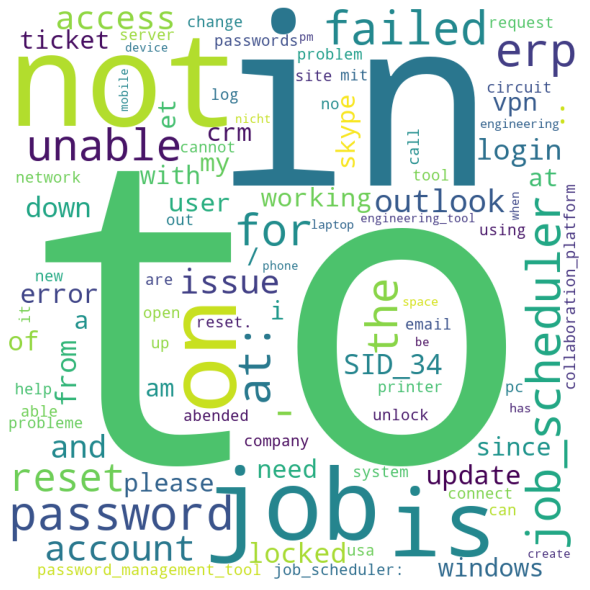

In [0]:
plot_wordcloud(Short_description_word_frequencies)

Words - to, in , not ,job, password are the most frequent words.

Many of these words are stopwords. Let us remove the standard passwords from the wordcloud library and look into the plot

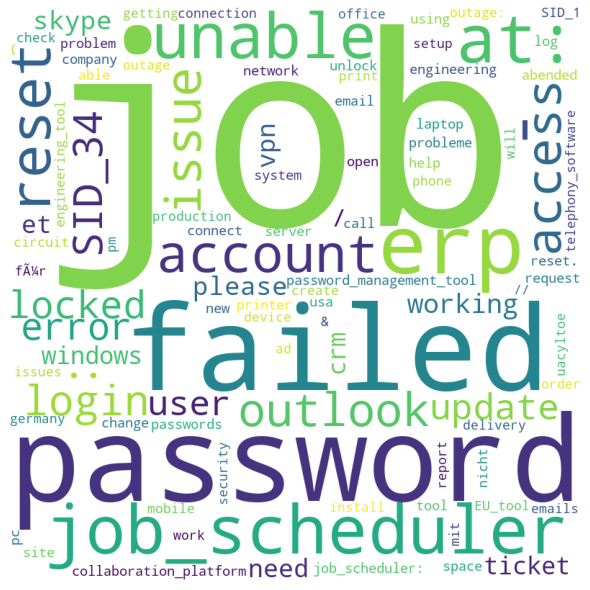

In [0]:
Short_description_word_frequencies_dict_without_stopwords = remove_stopwords_from_frequency(Short_description_word_frequencies,STOPWORDS)
plot_wordcloud(Short_description_word_frequencies_dict_without_stopwords)

After removing the stop words, we see that the most frequent words are -
job,password,failed,job_scheduler.

some interesting words we can see are - please , using, fA1/4r,probleme,uacyltoe

# Analyzing Description column

In [0]:
word_value_count = get_word_frequencies("Description")

In [0]:
print ("There are {} unique words under description column".format(len(word_value_count)))


There are 35028 unique words under description column


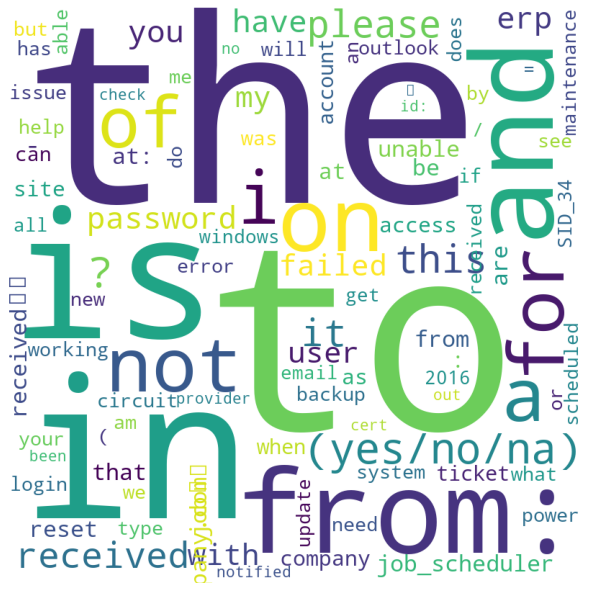

In [0]:
plot_wordcloud(word_value_count)

Many of these words are stopwords. Let us remove the standard passwords from the wordcloud library and look into the plot


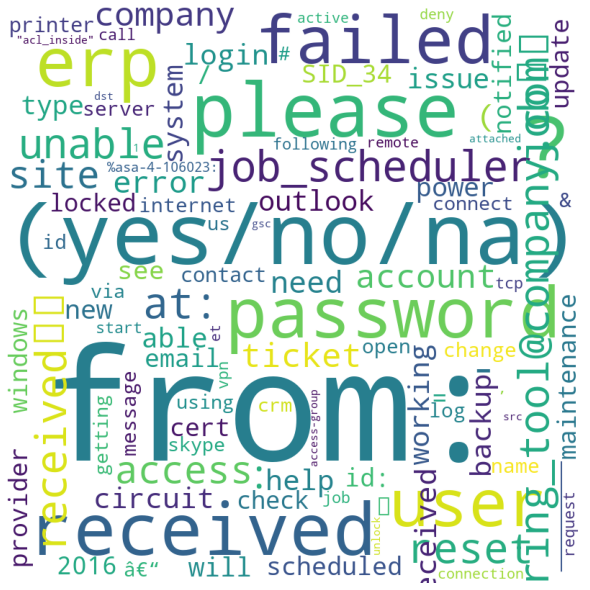

In [0]:
word_dict_without_stopwords = remove_stopwords_from_frequency(word_value_count,STOPWORDS)
plot_wordcloud(word_dict_without_stopwords)

After removing the stop words, we see that the most frequent words are - (yes/no/na),from:,received, received:

some interesting words we can see are - please , need, 2016,aE", id:,monitoring_tool@company.com

# Analyzing Caller Column 

In [0]:
print ("There are {} unique callers in our data".format(mydata['Caller'].nunique()))


There are 2950 unique callers in our data


In [0]:
mydata['Caller'].value_counts()[:20]

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
jyoqwxhz clhxsoqy     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
uvrbhlnt bjrmalzi     27
entuakhp xrnhtdmk     25
jionmpsf wnkpzcmv     24
vzqomdgt jwoqbuml     24
bozdftwx smylqejw     23
Name: Caller, dtype: int64

In [0]:
top_caller_data = mydata[mydata['Caller']== "bpctwhsn kzqsbmtp"]
top_caller_data['Short_description'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values(ascending=False)[:30]


                        1613.0
job                      807.0
in                       803.0
at:                      803.0
job_scheduler            803.0
failed                   803.0
23:00:00                  39.0
00:02:00                  30.0
Job_3028                  26.0
08/24/2016                26.0
Job_593                   25.0
09/03/2016                22.0
09/18/2016                22.0
08/23/2016                22.0
83.69.48.194              21.0
10/23/2016                20.0
10/09/2016                19.0
10/15/2016                18.0
08/22/2016                18.0
08/27/2016                18.0
09/17/2016                17.0
09/11/2016                17.0
10/05/2016                17.0
Job_1314                  16.0
09/24/2016                16.0
08/28/2016                15.0
10/02/2016                15.0
pp_EU_tool_netch_ap1      15.0
08/29/2016                15.0
10/16/2016                14.0
dtype: float64

Most of this callers ticket are related to job_scheduler and failed. This  tells us that these tickets may be automated tickets related to scheduled jobs .This caller may be an automated system.

#Copying dataset to df and cleaning duplicate rows

In [0]:
# Creating new dataset and find out the duplicate rows
df = mydata.copy()
df.duplicated().sum()

83

Observation: 
 
 
 There are some duplicate rows present in this dataset

In [0]:
df[df.duplicated()].head(10)

,Short_description,Description,Caller,Assignment_group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
724,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1064,job Job_1967d failed in job_scheduler at: 10/1...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
1125,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1744,phone issue,phone issue,gzjtweph mnslwfqv,GRP_0
1851,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


Observation:  
There are 83 rows which are duplicate in this data set. There can be a case where users faced the same issue and copied the same content to the new ticket but in either case, removing the duplicate will not make any difference in model creation or prediction.

In [0]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [0]:
df.shape

(8417, 4)

### Dropping Caller column from df dataset

Caller column is not going to help in creating a model and prediction because it doesn't matter who is creating the ticket allocation happens based on description or priority. So by removing the caller column, we are not losing any information.  

In [0]:
df.drop('Caller', axis=1, inplace=True)

In [0]:
df.head(2)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0


In [0]:
len(df[df["Short_description"] == df["Description"]])
#len(same_description)

2818

In [0]:
#Replacing the Description with Blank where Description and Short_description is same
df.loc[df["Short_description"] == df["Description"], "Description"] = ""

In [0]:
len(df[df["Short_description"] == df["Description"]])

0

In [0]:
df.shape

(8417, 3)

In [0]:
df.duplicated().sum()

508

# Duplicate Records

In [0]:
duplicate_records = mydata[mydata.duplicated()]
len(duplicate_records)

83

There are 83 records with duplicate information (same user, same description, same assignment group)

In [0]:
duplicate_tickets = mydata[mydata.duplicated(subset={"Short_description","Description","Caller"})]
len(duplicate_tickets)

90

There are 90 records with same user, same description. This denotes there are some records which have same user, same description but different groups.

Let us have a look at some of those records.

In [0]:
duplicate_tickets[:10]

,Short_description,Description,Caller,Assignment_group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
724,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1064,job Job_1967d failed in job_scheduler at: 10/1...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
1125,blank call,blank call,rbozivdq gmlhrtvp,GRP_0
1301,cannot review stock at mdw04 // mm 6720004,\r\n\r\nreceived from: aqrhwjgo.cyelqkvs@gmail...,aqrhwjgo cyelqkvs,GRP_0
1744,phone issue,phone issue,gzjtweph mnslwfqv,GRP_0


In [0]:
duplicates = duplicate_records.merge(duplicate_tickets, how = 'right' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
duplicates

,Short_description,Description,Caller,Assignment_group,_merge
185,cannot review stock at mdw04 // mm 6720004,\r\n\r\nreceived from: aqrhwjgo.cyelqkvs@gmail...,aqrhwjgo cyelqkvs,GRP_0,right_only
186,network problems (multiple applications are ru...,how did you determine there are network proble...,jgmlbxns pxjsdwrk,GRP_0,right_only
187,job Job_1314 failed in job_scheduler at: 08/25...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_9,right_only
188,job Job_2668 failed in job_scheduler at: 08/25...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8,right_only
189,job Job_1953a failed in job_scheduler at: 08/2...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6,right_only
190,job Job_3028 failed in job_scheduler at: 08/23...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_12,right_only
191,security incidents - ( dsw #in33407676 ) : tra...,source ip : 61.01.52.02617\r\nsystem name : lp...,ugyothfz ugrmkdhx,GRP_62,right_only


These are the short description-decription-caller information which is repeating.

Let us find all the records with these information.

In [0]:
mydata[mydata["Short_description"].isin(duplicates["Short_description"])]

,Short_description,Description,Caller,Assignment_group
1300,cannot review stock at mdw04 // mm 6720004,\r\n\r\nreceived from: aqrhwjgo.cyelqkvs@gmail...,aqrhwjgo cyelqkvs,GRP_6
1301,cannot review stock at mdw04 // mm 6720004,\r\n\r\nreceived from: aqrhwjgo.cyelqkvs@gmail...,aqrhwjgo cyelqkvs,GRP_0
3615,network problems (multiple applications are ru...,how did you determine there are network proble...,juaxnvwz reampilj,GRP_41
4011,network problems (multiple applications are ru...,"hi manjgtiry,\r\n\r\n",mcytlpva jutxbdor,GRP_0
4020,network problems (multiple applications are ru...,how did you determine there are network proble...,jgmlbxns pxjsdwrk,GRP_14
4026,network problems (multiple applications are ru...,how did you determine there are network proble...,jgmlbxns pxjsdwrk,GRP_0
4219,network problems (multiple applications are ru...,how did you determine there are network proble...,zcokibmd xnrthsmj,GRP_10ROWorLESS
6320,job Job_1314 failed in job_scheduler at: 08/25...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_60
6321,job Job_1314 failed in job_scheduler at: 08/25...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_60
6323,job Job_1314 failed in job_scheduler at: 08/25...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_60


Interestingly, what we have found is some tickets (same description and caller) are assigned to different user group. Technically, this is  **incorrect data**.


we have to check with the data source team about these records.

In [0]:
same_description = mydata[mydata["Short_description"] == mydata["Description"]]
len(same_description)

2862

2862 records have same description and short decription. As processing both will be redundant in those cases , let us blank out one of the column

In [0]:
mydata.loc[mydata["Short_description"] == mydata["Description"], "Description"] = ""

In [0]:
same_description = mydata[mydata["Short_description"] == mydata["Description"]]
len(same_description)

0

# Cleaning the Data

From above EDA and looking at the excel manually , we have found the patterns which needs to be cleaned up.

So following steps are done:

- remove  new line tags
- remove non ascii characters
- remove email ids
- remove email headers
- translate non-english words
- remove date-time
- remove attachments
- remove stop words
- remove punctuations
- remove numbers

In [0]:
#making a copy of the raw data before cleaning data
mydata_copy = mydata.copy()


#Saving dataset in drive

In [0]:
#Created backup by saving sataset to drive but using pickle to save and read data
# df.to_excel('/content/drive/My Drive/Modified_Dataset.xlsx')

In [0]:
#df.to_pickle('/content/drive/My Drive/Modified_Dataset.pickle')

In [0]:
capstone = pd.read_pickle('/content/drive/My Drive/Modified_Dataset.pickle')

In [0]:
capstone.head()

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
capstone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short_description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Assignment_group   8417 non-null   object
dtypes: object(3)
memory usage: 263.0+ KB


In [0]:
capstone[capstone.isna().any(axis=1)]

,Short_description,Description,Assignment_group


In [0]:
capstone.shape

(8417, 3)

In [0]:
print(capstone.duplicated().sum())

508


# Function to clean data

In [0]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"cant": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"wont": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
def clean_text(text, remove_stopwords=True):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
      if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

In [0]:
def basic_clean(text):
  text = text.lower()
  regex = re.compile(r'[\n\r\t]')
  text = regex.sub(" ", text) # Replace newLine Char
  regex = re.compile(r'received from: \S*@\S*\s?')
  text = regex.sub(" ", text)
  regex = re.compile(r'\S*@\S*\s?')
  text = regex.sub(" ", text) # Replacing Email
  regex = re.compile(r'\[cid:\S\]')
  text = regex.sub("", text)  # Replacing Image attachments
  #text = re.sub(cleanr, ' ', text)        #Removing HTML tags
  text = re.sub(r'[?|!|\'|"|#]',r'',text)
  text = re.sub(r'[.|,|)|(|\|/]',r' ',text)        #Removing Punctuations
  text = re.sub('[0-9]+', '', text) # Removing Numbers
  return text


In [0]:
def replcae_nonAsciiCharacters(text):
  return text.encode("ascii", "ignore").decode()

In [0]:
def replace_emailids(text):
  regex = re.compile(r'received from: \S*@\S*\s?')
  text = regex.sub(" ", text)
  regex = re.compile(r'\S*@\S*\s?')
  text = regex.sub(" ", text)
  return text

In [0]:
def replace_image_attachments(text):
  regex = re.compile(r'\[cid:\S\]')
  text = regex.sub("", text)
  return text

In [0]:
smart_experiment_stop_words = {'a', 'a\'s', 'able', 'about','above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against' ,'ain\'t' ,'all' ,'allow', 'allows' ,'almost', 'alone', 'along', 'already' ,'also' ,'although' ,'always' ,'am' ,'among' ,'amongst', 'an','and','another','any','anybody','anyhow','anyone','anything','anyway' ,'anyways','anywhere','apart','appear','appreciate','appropriate','are','aren\'t','around','as','aside','ask', 'asking', 'associated', 'at' ,'available' ,'away' ,'awfully' ,'b' ,'be' ,'became' ,'because' ,'become' ,'becomes' ,'becoming' ,'been' ,'before' ,'beforehand' ,'behind' ,'being' ,'believe' ,'below' ,'beside' ,'besides' ,'best', 'better' ,'between' ,'beyond' ,'both', 'brief', 'but', 'by' ,'c' ,'c\'mon' ,'c\'s' ,'came' ,'can' ,'can\'t' ,'cannot' ,'cant', 'cause' ,'causes', 'certain', 'certainly' ,'changes' ,'clearly', 'co' ,'com' ,'come', 'comes', 'concerning' ,'consequently' ,'consider' ,'considering' ,'contain' ,'containing' ,'contains' ,'corresponding' ,'could', 'couldn\'t' ,'course' ,'currently' ,'d', 'definitely', 'described', 'despite' ,'did' ,'didn\'t' ,'different' ,'do' ,'does' ,'doesn\'t', 'doing', 'don\'t', 'done' ,'down', 'downwards', 'during', 'e' ,'each', 'edu' ,'eg' ,'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc' ,'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex' ,'exactly', 'example', 'except', 'f' ,'far', 'few', 'fifth' ,'first', 'five' ,'followed' ,'following' ,'follows' ,'for' ,'former' ,'formerly', 'forth' ,'four' ,'from' ,'further' ,'furthermore' ,'g', 'get', 'gets', 'getting', 'given' ,'gives' ,'go', 'goes' ,'going', 'gone', 'got', 'gotten', 'greetings' ,'h', 'had' ,'hadn\'t', 'happens', 'hardly', 'has', 'hasn\'t' ,'have' ,'haven\'t', 'having', 'he' ,'he\'s', 'hello', 'help' ,'hence' ,'her' ,'here' ,'here\'s', 'hereafter' ,'hereby', 'herein' ,'hereupon', 'hers', 'herself', 'hi', 'him' ,'himself', 'his' ,'hither', 'hopefully', 'how' ,'howbeit' ,'however', 'i', 'i\'d' ,'i\'ll', 'i\'m' ,'i\'ve' ,'ie', 'if' ,'ignored' ,'immediate' ,'in' ,'inasmuch', 'inc', 'indeed', 'indicate', 'indicated' ,'indicates', 'inner', 'insofar' ,'instead' ,'into' ,'inward' ,'is', 'isn\'t' ,'it', 'it\'d', 'it\'ll', 'it\'s' ,'its' ,'itself' ,'j', 'just', 'k' ,'keep' ,'keeps', 'kept', 'know', 'knows', 'known' ,'l' ,'last', 'lately', 'later', 'latter', 'latterly', 'least' ,'less' ,'lest' ,'let' ,'let\'s' ,'like', 'liked','likely' ,'little', 'look', 'looking', 'looks', 'ltd', 'm' ,'mainly', 'many', 'may', 'maybe', 'me' ,'mean', 'meanwhile', 'merely', 'might' ,'more' ,'moreover', 'most' ,'mostly', 'much', 'must' ,'my' ,'myself' ,'n', 'name', 'namely', 'nd' ,'near' ,'nearly', 'necessary' ,'need', 'needs', 'neither' ,'never' ,'nevertheless', 'new', 'next', 'nine', 'no' ,'nobody', 'non' ,'none', 'noone' ,'nor', 'normally', 'not', 'nothing', 'novel', 'now' ,'nowhere' ,'o', 'obviously' ,'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over' ,'overall', 'own', 'p' ,'particular' ,'particularly', 'per' ,'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q' ,'que' ,'quite', 'qv', 'r', 'rather', 'rd', 're' ,'really' ,'reasonably', 'regarding' ,'regardless' ,'regards', 'relatively', 'respectively', 'right' ,'s' ,'said', 'same', 'saw', 'say', 'saying', 'says', 'second' ,'secondly' ,'see', 'seeing', 'seem', 'seemed' ,'seeming', 'seems', 'seen' ,'self' ,'selves' ,'sensible', 'sent' ,'serious' ,'seriously', 'seven', 'several', 'shall', 'she', 'should', 'shouldn\'t', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat' ,'somewhere', 'soon', 'sorry' ,'specified', 'specify' ,'specifying', 'still', 'sub' ,'such' ,'sup', 'sure', 't', 't\'s', 'take', 'taken', 'tell' ,'tends' ,'th', 'than', 'thank', 'thanks' ,'thanx' ,'that', 'that\'s' ,'thats' ,'the', 'their' ,'theirs', 'them' ,'themselves', 'then', 'thence', 'there' ,'there\'s' ,'thereafter', 'thereby' ,'therefore' ,'therein', 'theres' ,'thereupon' ,'these', 'they', 'they\'d', 'they\'ll', 'they\'re', 'they\'ve', 'think', 'third', 'this', 'thorough' ,'thoroughly', 'those' ,'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too' ,'took', 'toward' ,'towards', 'tried', 'tries', 'truly' ,'try', 'trying', 'twice' ,'two', 'u', 'un' ,'under', 'unfortunately', 'unless' ,'unlikely' ,'until', 'unto', 'up' ,'upon', 'us', 'use', 'used', 'useful', 'uses' ,'using' ,'usually', 'uucp', 'v', 'value', 'various', 'very', 'via' ,'viz', 'vs', 'w', 'want', 'wants', 'was', 'wasn\'t', 'way', 'we', 'we\'d' ,'we\'ll', 'we\'re', 'we\'ve', 'welcome' ,'well' ,'went', 'were', 'weren\'t', 'what' ,'what\'s', 'whatever', 'when' ,'whence' ,'whenever', 'where' ,'where\'s', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'who\'s', 'whoever', 'whole' ,'whom' ,'whose', 'why', 'will', 'willing' ,'wish', 'with', 'within', 'without', 'won\'t', 'wonder', 'would', 'would', 'wouldn\'t', 'x' ,'y', 'yes', 'yet', 'you', 'you\'d', 'you\'ll', 'you\'re', 'you\'ve', 'your', 'yours', 'yourself' ,'yourselves', 'z', 'zero'}

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def remove_stop_words_nltk(text):
  custom_stopwords = {'subject','fw','fwd','(yes/no/na)','pm','am','#','january','february','march','april','may','june','july','august','september','october','november','december',
                      'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec' ,'monday','tuesday','wednesday','thursday','friday','saturday','sunday',
                      'mon','tue','wed','thu','fri','sat','sun'}
  nltk_stopwords = set(stopwords.words('english')) 
  total_stopwords = custom_stopwords.union(smart_experiment_stop_words)
  total_stopwords = total_stopwords.union(nltk_stopwords)
  resultwords = [word for word in re.split("\W+",text) if word.lower() not in total_stopwords]
  return ' '.join(resultwords)

In [0]:
def replace_email_headers(text):
  headers = Parser(policy=default).parsestr(text)
  headers.__delitem__('from')
  headers.__delitem__('sent')
  headers.__delitem__('to')
  headers.__delitem__('cc')
  return str(headers)

In [0]:
def remove_punctuation(text):
  text  = "".join([char for char in text if char not in string.punctuation])
  return text

In [0]:
# Creating dictionary for the stop word
def remove_custom_stop_words_Dicti(text):
  custom_stopwords = {'subject','(yes/no/na)','_no_','_yes_','_na_''pm','am','#','et','did',
                      'doing', 'what', 'isn', "wasn't", 'now', 'ours', 'when', 'it', 'was', "hadn't",
                      "it's", 'y', 'hadn', 'you', 'o', 'do', 'that', "that'll", 'which', 'them',
                      'theirs',"you're", 'he', 'there', 'how', 'mustn', "couldn't", "isn't",
                      'this', 'she', 'wasn', 'aren', 'had', 'at', 'needn', 'a', 'us', 'sent'
                      'their', "hasn't", 'our', 'i', 'we', 'from', 'ain', 'hi', 'hello', 'thanks', 'thank'
                      'those', 'mightn', 'if', "mightn't", 'so', 'and', 'just', 're', "mustn't",
                      'until', 'shan', 'no', 'while', 'have', 'will', 'has', "needn't", 'own',
                      'd', 'were', 'than', 'more', 'for', 'any', 'weren', 'whom', 'should',
                      'shouldn', "you'll", 'as', 't', 'are', 'or', 'then', 'into', 'with', 'here',
                      "you'd", 'his', 'they', "aren't", 'haven', "you've", 'been', 'your', 'am', 've',
                      'couldn', 'having', 'didn', 'by', 'an', "weren't", "she's", 'such', 'me', "didn't",
                      'ourselves', 'the', "haven't", 'who', 'wouldn', 'don', 'not', 'yourself', "wouldn't",
                      "should've", 'him', 's', 'herself', 'its', 'up', "won't", "don't", 'once', 'some',
                      "doesn't", 'too', 'where', 'doesn', 'all', 'hers', 'during', 'few', 'why', 'but', 'of', 
                      'll', 'yourselves', 'is', "shouldn't", 'nor', 'be', "shan't", 'm', 'before', 'ma',
                      'does', 'her', 'hasn', 'my', 'myself', 'to', 'on', 'very', 'these', 'again', 'both', 'yours', 'himself'}
  resultwords = [word for word in re.split("\W+",text) if word.lower() not in custom_stopwords]
  return ' '.join(resultwords)

In [0]:
def translate_text(text):
  translator = Translator()
  translated_text = translator.translate(text)
  return translated_text.text

# Basic Model Creation

In [0]:
#Making a copy of df dataframe
df_Basic = capstone.copy()
df_Basic.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
# Merging Description and short Discription
df_Basic['Merged_Description'] = df_Basic[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
#Dropping the column "Short_description" & "Description" as we have merged it in one.
df_Basic.drop(["Short_description","Description"], axis = 1, inplace=True)
df_Basic.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,GRP_0,unable to access hr_tool page
4,GRP_0,skype error


In [0]:
#Splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(df_Basic['Merged_Description'], df_Basic['Assignment_group'], test_size=0.2)

#Creating a pipeline that first creates bag of words(after applying stopwords) & then applies Multinomial Naive Bayes model
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [0]:
#Training our data
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
#Predicting the label for the test data
pred = pipeline.predict(X_test)

In [0]:
#Checking the performance of our model
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

                 precision    recall  f1-score   support

          GRP_0       0.56      1.00      0.72       795
          GRP_1       0.00      0.00      0.00         9
         GRP_10       0.00      0.00      0.00        27
GRP_10ROWorLESS       0.00      0.00      0.00        14
         GRP_11       0.00      0.00      0.00         6
         GRP_12       0.59      0.18      0.27        57
         GRP_13       0.00      0.00      0.00        22
         GRP_14       0.00      0.00      0.00        24
         GRP_15       0.00      0.00      0.00         4
         GRP_16       0.00      0.00      0.00        20
         GRP_17       0.00      0.00      0.00        15
         GRP_18       0.00      0.00      0.00        15
         GRP_19       0.00      0.00      0.00        47
          GRP_2       0.67      0.04      0.07        51
         GRP_20       0.00      0.00      0.00         5
         GRP_21       0.00      0.00      0.00         6
         GRP_22       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Cleaning dataset but keeping stopwords

In [0]:
#Making a copy of df dataframe
df_WithStopwords = capstone.copy()
df_WithStopwords.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_clean_With_Stopwords(text):
  text = replace_email_headers(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_punctuation(text)
  return text

In [0]:
df_WithStopwords['Description'] = df_WithStopwords['Description'].apply(data_clean_With_Stopwords)
df_WithStopwords['Short_description'] = df_WithStopwords['Short_description'].apply(data_clean_With_Stopwords)
df_WithStopwords.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager name...,GRP_0
1,outlook,hello team my meetings skype meetings et...,GRP_0
2,cant log in to vpn,hi i cannot log on to vpn best,GRP_0
3,unable to access hrtool page,,GRP_0
4,skype error,,GRP_0


In [0]:
# Merging Description and short Discription
df_WithStopwords['Merged_Description'] = df_WithStopwords[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
#Dropping the column "Short_description" & "Description" as we have merged it in one.
df_WithStopwords.drop(["Short_description","Description"], axis = 1, inplace=True)
df_WithStopwords.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook hello team my meetings skype me...
2,GRP_0,cant log in to vpn hi i cannot log on to...
3,GRP_0,unable to access hrtool page
4,GRP_0,skype error


In [0]:
df_WithStopwords['Merged_Description'].value_counts()

 job job failed in jobscheduler at          job job failed in jobscheduler at                                                                                                                                                                                                                                                                                                                                        405
 abended job in jobscheduler job     abended job in jobscheduler job at                                                                                                                                                                                                                                                                                                                                               79
 ticket update on inplant                                                                                                                                                             

In [0]:
# Duplicate in Merged_Description column
print(df_WithStopwords['Merged_Description'].duplicated().sum())
#Finding out the duplicate in whole data set
print(df_WithStopwords.duplicated().sum())

1540
1463


In [0]:
# Removing duplicate rows which are same in both the columns
df_WithStopwords.drop_duplicates(inplace=True)
print(df_WithStopwords.duplicated().sum())
print(df_WithStopwords.shape)

0
(6954, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_WithStopwords['Merged_Description'] = df_WithStopwords['Merged_Description'].str.replace("cant","cannot")
df_WithStopwords['Merged_Description'] = df_WithStopwords['Merged_Description'].str.replace("wont","willnot")

In [0]:
df_WithStopwords.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee ...
1,GRP_0,outlook hello team my meetings skype me...
2,GRP_0,can not log in to vpn hi i cannot log on...
3,GRP_0,unable to access hrtool page
4,GRP_0,skype error


In [0]:
# Spiliting the data to get the length
sentence = df_WithStopwords['Merged_Description']
max_len = max([len(s.split()) for s in sentence])

print(max_len)

1227


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_WithStopwords['Merged_Description'] = df_WithStopwords['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_WithStopwords['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, hello, team, my, meetings, skype, me...
2    [can, not, log, in, to, vpn, hi, i, cannot, lo...
3                   [unable, to, access, hrtool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
df_WithStopwords['Merged_Description'][3]

['unable', 'to', 'access', 'hrtool', 'page']

In [0]:

from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_WithStopwords['Merged_Description'] = df_WithStopwords['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_WithStopwords.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user detail employee mana...
1,GRP_0,outlook hello team my meeting skype meeting et...
2,GRP_0,can not log in to vpn hi i cannot log on to vp...
3,GRP_0,unable to access hrtool page
4,GRP_0,skype error


Converting Groups to numbers

In [0]:
df_WithStopwords.Assignment_group = pd.Categorical(df_WithStopwords.Assignment_group)
df_WithStopwords['Assignment_group_new'] = df_WithStopwords.Assignment_group.cat.codes
df_WithStopwords.head()

,Assignment_group,Merged_Description,Assignment_group_new
0,GRP_0,login issue verified user detail employee mana...,0
1,GRP_0,outlook hello team my meeting skype meeting et...,0
2,GRP_0,can not log in to vpn hi i cannot log on to vp...,0
3,GRP_0,unable to access hrtool page,0
4,GRP_0,skype error,0


In [0]:
df_WithStopwords.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_WithStopwords.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook hello team my meeting skype meeting et...,0
2,can not log in to vpn hi i cannot log on to vp...,0
3,unable to access hrtool page,0
4,skype error,0


In [0]:
df_WithStopwords['Assignment_group_new'].max()

49

In [0]:
test_list_Short = [df_WithStopwords] 
  
# printing original list  
print("The original list : " + str(test_list_Short)) 
  
# Minimum String length 
# using min() + generator expression 
res = min(len(ele) for ele in test_list_Short) 
  
# printing result 
print("Length of minimum string is : " + str(res)) 

The original list : [                                     Merged_Description  Assignment_group_new
0     login issue verified user detail employee mana...                     0
1     outlook hello team my meeting skype meeting et...                     0
2     can not log in to vpn hi i cannot log on to vp...                     0
3                          unable to access hrtool page                     0
4                                           skype error                     0
...                                                 ...                   ...
8495  email not coming in from zz mail good afternoo...                    23
8496                            telephonysoftware issue                     0
8497    vip window password reset for tifpdchb pedxruyf                     0
8498  machine no est funcionando i am unable to acce...                    45
8499  an mehreren pc lassen sich verschiedene prgram...                     3

[6954 rows x 2 columns]]
Length of minimum

In [0]:
max_features = 20000
maxlen = 1000
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_WithStopwords['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_WithStopwords['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 13812 unique tokens.
(6954, 1000)


In [0]:
X = tokenizer.texts_to_sequences(df_WithStopwords['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_WithStopwords['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6954
[ 57  21 241  20 173 207 133  51 453   2  20  51   4 328   8  31   2  19
 708   2  20   1  57   8 115 563 404  41 189  60  81   1  57  21 381   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4867, 1000)
(2087, 1000)
(4867,)
(2087,)


LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
49/49 [==============================] - 314s 6s/step - loss: 2.8436 - accuracy: 0.4216 - val_loss: 2.5522 - val_accuracy: 0.4691
Epoch 2/2
49/49 [==============================] - 313s 6s/step - loss: 2.5583 - accuracy: 0.4689 - val_loss: 2.5552 - val_accuracy: 0.4691


In [0]:
Score, Accuracy = LSTM_model.evaluate(X_test, y_test, batch_size=64)
predicted_labels = LSTM_model.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

33/33 [==============================] - 19s 566ms/step - loss: 2.5531 - accuracy: 0.4691
Test score: 2.5531082153320312
Test accuracy: 0.4690943956375122


Observation

The model is not performing very well but without removing stopwords it is expected. We are getting 46% Accuracy. We can try changing the hyperparameter and with more epoch.

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
49/49 [==============================] - 315s 6s/step - loss: 2.7266 - accuracy: 0.4617 - val_loss: 2.5563 - val_accuracy: 0.4691
Epoch 2/5
49/49 [==============================] - 314s 6s/step - loss: 2.5627 - accuracy: 0.4689 - val_loss: 2.5515 - val_accuracy: 0.4691
Epoch 3/5
49/49 [==============================] - 318s 6s/step - loss: 2.5567 - accuracy: 0.4689 - val_loss: 2.5473 - val_accuracy: 0.4691
Epoch 4/5
49/49 [==============================] - 318s 6s/step - loss: 2.5582 - accuracy: 0.4689 - val_loss: 2.5500 - val_accuracy: 0.4691
Epoch 5/5
49/49 [==============================] - 317s 6s/step - loss: 2.5554 - accuracy: 0.4689 - val_loss: 2.5518 - val_accuracy: 0.4691


In [0]:
Score, Accuracy = LSTM_model.evaluate(X_test, y_test, batch_size=100)
predicted_labels = LSTM_model.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 17s 825ms/step - loss: 2.5518 - accuracy: 0.4691
Test score: 2.551757335662842
Test accuracy: 0.4690943956375122


Observation

Changing hyperparameter is not helping and I am getting the same val_accuracy (46%). It seems like there is something wrong with the test split.

Bidirectional LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
49/49 [==============================] - 638s 13s/step - loss: 2.8450 - accuracy: 0.4302 - val_loss: 2.5780 - val_accuracy: 0.4691
Epoch 2/5
49/49 [==============================] - 629s 13s/step - loss: 2.5109 - accuracy: 0.4689 - val_loss: 2.3444 - val_accuracy: 0.4691
Epoch 3/5
49/49 [==============================] - 642s 13s/step - loss: 2.2352 - accuracy: 0.4935 - val_loss: 2.2085 - val_accuracy: 0.5026
Epoch 4/5
49/49 [==============================] - 632s 13s/step - loss: 2.0341 - accuracy: 0.5326 - val_loss: 2.1565 - val_accuracy: 0.5319
Epoch 5/5
49/49 [==============================] - 636s 13s/step - loss: 1.8643 - accuracy: 0.5517 - val_loss: 2.0786 - val_accuracy: 0.5328


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
Score, Accuracy = LSTM_model.evaluate(X_test, y_test, batch_size=100)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 34s 2s/step - loss: 2.0786 - accuracy: 0.5328
Test score: 2.0785844326019287
Test accuracy: 0.5328222513198853


Observation

Bidirectional LSTM is performing well and giving good accuracy with compare to previous runs(Test accuracy: 0.5328222513198853). Maybe with more epoch, it will perform well.

SimpleRNN

In [0]:
RNN_Model = Sequential()
RNN_Model.add(Embedding(max_features, 200, input_length=maxlen))
RNN_Model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
RNN_Model.add(Dense(128,activation='sigmoid'))
RNN_Model.add(Dense(128, activation='relu'))
RNN_Model.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
RNN_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

RNN_Model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
49/49 [==============================] - 83s 2s/step - loss: 2.6974 - accuracy: 0.4600 - val_loss: 2.5519 - val_accuracy: 0.4691
Epoch 2/5
49/49 [==============================] - 83s 2s/step - loss: 2.5560 - accuracy: 0.4689 - val_loss: 2.5489 - val_accuracy: 0.4691
Epoch 3/5
49/49 [==============================] - 82s 2s/step - loss: 2.5570 - accuracy: 0.4689 - val_loss: 2.5495 - val_accuracy: 0.4691
Epoch 4/5
49/49 [==============================] - 82s 2s/step - loss: 2.5588 - accuracy: 0.4689 - val_loss: 2.5479 - val_accuracy: 0.4691
Epoch 5/5
49/49 [==============================] - 82s 2s/step - loss: 2.5598 - accuracy: 0.4689 - val_loss: 2.5494 - val_accuracy: 0.4691


Accuracy with simple RNN is like previous models and val_accuracy is the same with all the epoch. Split is playing an important role here because there is a major class imbalance in the data.

Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.model_selection import cross_val_score 

accuracies_nb= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_nb_mean=accuracies_nb.mean()*100
print("Mean Accuracy:Naive Bayes=",accuracies_nb_mean)

accuracies_nb_std=accuracies_nb.std()*100
print("Standard Deviation:Naive Bayes=",accuracies_nb_std)


[[ 1  2  0 ... 35  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  4  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  2  0  1]
 [ 0  0  0 ...  1  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       979
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        74
           6       0.00      0.00      0.00        43
           7       0.17      0.03      0.05        35
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        26
          10       1.00      0.15      0.26        20
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        64
          13       0.27      0.10      0.14        72
          14       0.00      0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy:Naive Bayes= 1.9314100776569403
Standard Deviation:Naive Bayes= 0.7807614014504879


Grove

In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13800 unique tokens.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 200

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

13801


In [0]:
from keras.initializers import Constant
LSTM_model = Sequential()
LSTM_model.add(Embedding(num_words, 200, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
LSTM_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=2, validation_data=(X_test, y_test))


Epoch 1/2
49/49 [==============================] - 637s 13s/step - loss: 45.3542 - accuracy: 0.0095 - val_loss: 45.4576 - val_accuracy: 0.0120
Epoch 2/2
49/49 [==============================] - 643s 13s/step - loss: 45.3766 - accuracy: 0.0117 - val_loss: 45.4573 - val_accuracy: 0.0120


Observation

With glove embedding, it is not performing well

# Cleaning Dataset with custom dictionary for the stop word

In [0]:
#Making a copy of df dataframe
df_Dicti_StopWord = capstone.copy()
df_Dicti_StopWord.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_clean_with_Dicti_stopwords(text):
  text = replace_email_headers(text)
  text = basic_clean(text)
  text = remove_custom_stop_words_Dicti(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_punctuation(text)
  return text

In [0]:
df_Dicti_StopWord['Description'] = df_Dicti_StopWord['Description'].apply(data_clean_with_Dicti_stopwords)
df_Dicti_StopWord['Short_description'] = df_Dicti_StopWord['Short_description'].apply(data_clean_with_Dicti_stopwords)
df_Dicti_StopWord.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager name c...,GRP_0
1,outlook,team meetings skype meetings etc appearing in...,GRP_0
2,cant log in vpn,cannot log vpn best,GRP_0
3,unable access hrtool page,,GRP_0
4,skype error,,GRP_0


In [0]:
# Merging Description and short Discription
df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
df_Dicti_StopWord.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
df_Dicti_StopWord.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings etc app...
2,GRP_0,cant log in vpn cannot log vpn best
3,GRP_0,unable access hrtool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
df_Dicti_StopWord.drop_duplicates(inplace=True)
print(df_Dicti_StopWord.duplicated().sum())
print(df_Dicti_StopWord.shape)

0
(6919, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord['Merged_Description'].str.replace("cant","cannot")
df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord['Merged_Description'].str.replace("wont","willnot")

In [0]:
# Spiliting the data to get the length
sentence = df_Dicti_StopWord['Merged_Description']
max_len = max([len(s.split()) for s in sentence])

print(max_len)

1029


In [0]:
#def remove_contractions(text):
 # text = clean_text(text)
  #return text

In [0]:
#df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord['Merged_Description'].apply(remove_contractions)
#df_Dicti_StopWord.head()

In [0]:
df_Dicti_StopWord.Assignment_group = pd.Categorical(df_Dicti_StopWord.Assignment_group)
df_Dicti_StopWord['Assignment_group_new'] = df_Dicti_StopWord.Assignment_group.cat.codes
df_Dicti_StopWord.head()

,Assignment_group,Merged_Description,Assignment_group_new
0,GRP_0,login issue verified user details employee m...,0
1,GRP_0,outlook team meetings skype meetings etc app...,0
2,GRP_0,cannot log in vpn cannot log vpn best,0
3,GRP_0,unable access hrtool page,0
4,GRP_0,skype error,0


In [0]:
df_Dicti_StopWord.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_Dicti_StopWord.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings etc app...,0
2,cannot log in vpn cannot log vpn best,0
3,unable access hrtool page,0
4,skype error,0


In [0]:
print(df_Dicti_StopWord['Assignment_group_new'].max())

49


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_Dicti_StopWord['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, etc...
2       [cannot, log, in, vpn, cannot, log, vpn, best]
3                       [unable, access, hrtool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_Dicti_StopWord['Merged_Description'] = df_Dicti_StopWord['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_Dicti_StopWord.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting etc appeari...,0
2,cannot log in vpn cannot log vpn best,0
3,unable access hrtool page,0
4,skype error,0


In [0]:
max_features = 20000
maxlen = 800 
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_Dicti_StopWord['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_Dicti_StopWord['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 13065 unique tokens.
(6919, 800)


In [0]:
#Define X and y for your model
X = tokenizer.texts_to_sequences(df_Dicti_StopWord['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_Dicti_StopWord['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6919
[ 33  10 191   7 128 156  93  26 397   7  26   1 268  11   6 672   7  33
  75 537 351  53  33  10 336   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4843, 800)
(2076, 800)
(4843,)
(2076,)


LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
49/49 [==============================] - 252s 5s/step - loss: 2.7549 - accuracy: 0.4367 - val_loss: 2.5709 - val_accuracy: 0.4644
Epoch 2/2
49/49 [==============================] - 253s 5s/step - loss: 2.5853 - accuracy: 0.4646 - val_loss: 2.5770 - val_accuracy: 0.4644


In [0]:
Score, Accuracy = LSTM_model.evaluate(X_test, y_test, batch_size=100)
predicted_labels = LSTM_model.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 14s 651ms/step - loss: 2.5770 - accuracy: 0.4644
Test score: 2.5770435333251953
Test accuracy: 0.4643545150756836


Observation

After removing the words with the dictionary I don't see much improvement in the model as it is not giving very good accuracy and close to the previous models but it is showing little improvement (Test accuracy: 47%).

RNN


In [0]:
RNN_Model = Sequential()
RNN_Model.add(Embedding(max_features, 200, input_length=maxlen))
RNN_Model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
RNN_Model.add(Dense(128,activation='sigmoid'))
RNN_Model.add(Dense(128, activation='relu'))
RNN_Model.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
RNN_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

RNN_Model.fit(X_train, y_train, batch_size=100, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
49/49 [==============================] - 66s 1s/step - loss: 2.8722 - accuracy: 0.4256 - val_loss: 2.5774 - val_accuracy: 0.4644
Epoch 2/3
49/49 [==============================] - 66s 1s/step - loss: 2.5767 - accuracy: 0.4646 - val_loss: 2.5655 - val_accuracy: 0.4644
Epoch 3/3
49/49 [==============================] - 66s 1s/step - loss: 2.5772 - accuracy: 0.4646 - val_loss: 2.5668 - val_accuracy: 0.4644


In [0]:
Score, Accuracy = RNN_Model.evaluate(X_test, y_test, batch_size=100)
predicted_labels = RNN_Model.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 5s 219ms/step - loss: 2.5668 - accuracy: 0.4644
Test score: 2.5668320655822754
Test accuracy: 0.4643545150756836


Observation

Simple RNN also doesn't show much improvement after data cleaning with the help of the dictionary. Val Accuracy is 47%

Naive Bayes

Bidirectional LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
49/49 [==============================] - 499s 10s/step - loss: 2.8578 - accuracy: 0.4175 - val_loss: 2.5903 - val_accuracy: 0.4644
Epoch 2/5
49/49 [==============================] - 502s 10s/step - loss: 2.4897 - accuracy: 0.4646 - val_loss: 2.3522 - val_accuracy: 0.4644
Epoch 3/5
49/49 [==============================] - 502s 10s/step - loss: 2.2167 - accuracy: 0.4989 - val_loss: 2.2107 - val_accuracy: 0.5039
Epoch 4/5
49/49 [==============================] - 504s 10s/step - loss: 1.9997 - accuracy: 0.5325 - val_loss: 2.1448 - val_accuracy: 0.5217
Epoch 5/5
49/49 [==============================] - 504s 10s/step - loss: 1.8243 - accuracy: 0.5691 - val_loss: 2.1188 - val_accuracy: 0.5265


In [0]:
Score, Accuracy = LSTM_model.evaluate(X_test, y_test, batch_size=100)
predicted_labels = LSTM_model.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 27s 1s/step - loss: 2.1188 - accuracy: 0.5265
Test score: 2.1187503337860107
Test accuracy: 0.5264932513237


Observation


Bidirectional LSTM is performing well but accuracy is same as the previous Bidirectional LSTM model that we have created with basic cleaning. So overall I don't see much improvement



# Cleaning the Data with  custom Dictionary and nltk library

In [0]:
#Making a copy of df dataframe
df_nltk_StopWord = capstone.copy()
df_nltk_StopWord.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_nltk_clean(text):
  #text = translate_text(text)
  text = replace_email_headers(text)
  text = replace_emailids(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_stop_words_nltk(text)
  return text

In [0]:
df_nltk_StopWord['Description'] = df_nltk_StopWord['Description'].apply(data_nltk_clean)
df_nltk_StopWord['Short_description'] = df_nltk_StopWord['Short_description'].apply(data_nltk_clean)
df_nltk_StopWord.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager checke...,GRP_0
1,outlook,team meetings skype meetings appearing outloo...,GRP_0
2,log vpn,log vpn,GRP_0
3,unable access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
duplicate_records = df_nltk_StopWord[df_nltk_StopWord.duplicated()]
len(duplicate_records)

1564

In [0]:
same_description_nltk = df_nltk_StopWord[df_nltk_StopWord["Short_description"] == df_nltk_StopWord["Description"]]
len(same_description_nltk)

901

After cleaning a lot of rows in both the columns 901 columns data became the same So I am planning to replace those to avoid duplicate.

In [0]:
df_nltk_StopWord.loc[df_nltk_StopWord["Short_description"] == df_nltk_StopWord["Description"], "Description"] = ""

In [0]:
same_description_nltk = df_nltk_StopWord[df_nltk_StopWord["Short_description"] == df_nltk_StopWord["Description"]]
len(same_description_nltk)

0

In [0]:
# Merging Description and short Discription
df_nltk_StopWord['Merged_Description'] = df_nltk_StopWord[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
df_nltk_StopWord.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
df_nltk_StopWord.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
df_nltk_StopWord.drop_duplicates(inplace=True)
print(df_nltk_StopWord.duplicated().sum())
print(df_nltk_StopWord.shape)

0
(6847, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_nltk_StopWord['Merged_Description'] = df_nltk_StopWord['Merged_Description'].str.replace("cant","cannot")
df_nltk_StopWord['Merged_Description'] = df_nltk_StopWord['Merged_Description'].str.replace("wont","willnot")

In [0]:
# Spiliting the data to get the length
sentence = df_nltk_StopWord['Merged_Description']
max_len = max([len(s.split()) for s in sentence])
min_len = min([len(s.split()) for s in sentence])

print(max_len)
print(min_len)

734
0


Observation

Max sentence length is 734 and min is zero which is strange. if sentence length is 0 then how is it going to help in creating a model and prediction. I am not sure if removing is a good idea because it might eliminate a few of the groups. It needs more investigation. 

In [0]:
df_nltk_StopWord.Assignment_group = pd.Categorical(df_nltk_StopWord.Assignment_group)
df_nltk_StopWord['Assignment_group_new'] = df_nltk_StopWord.Assignment_group.cat.codes
df_nltk_StopWord.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_nltk_StopWord.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
df_nltk_StopWord['Merged_Description'].value_counts()

 job job_ failed job_scheduler                                                                                                                                                                                                                                                 15
                                                                                                                                                                                                                                                                               11
 abended job job_scheduler job_  abended job job_scheduler job_                                                                                                                                                                                                                 7
 account locked                                                                                                                                                                   

In [0]:
#df_nltk_StopWord.to_pickle('/content/drive/My Drive/cleandata_nltk.pickle')

In [0]:
df_nltk_StopWord_clean = pd.read_pickle('/content/drive/My Drive/cleandata_nltk.pickle')
df_nltk_StopWord_clean.head()

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_nltk_StopWord['Merged_Description'] = df_nltk_StopWord['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_nltk_StopWord['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
# Checking the records whose length is 0
df_nltk_StopWord[df_nltk_StopWord['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new
476,[],31
491,[],0
1081,[],39
1178,[],25
1352,[],48
2004,[],26
3326,[],13
4389,[],12
4876,[],20
5858,[],38


These value with length zero will not help so I am going to remove these rows

In [0]:
# Creating index so we can remove these records
min_len_desc = df_nltk_StopWord[df_nltk_StopWord['Merged_Description'].map(len) == 0].index

In [0]:
# Dropping the records with length zero
df_nltk_StopWord.drop(min_len_desc, axis=0, inplace=True)

In [0]:
df_nltk_StopWord[df_nltk_StopWord['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new


In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_nltk_StopWord['Merged_Description'] = df_nltk_StopWord['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_nltk_StopWord.head(5)


,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
max_features = 20000
maxlen = 800 # max len
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_nltk_StopWord['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 12610 unique tokens.
(6836, 800)


In [0]:
#Define X and y for your model and trying post padding
X = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_nltk_StopWord['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6836
[ 28   8 155   4 106 125  75 324   4 228  10   2 552   4  28  57 435 283
  28   8 273   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4785, 800)
(2051, 800)
(4785,)
(2051,)


LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
48/48 [==============================] - 222s 5s/step - loss: 2.7477 - accuracy: 0.4466 - val_loss: 2.5759 - val_accuracy: 0.4642
Epoch 2/2
48/48 [==============================] - 219s 5s/step - loss: 2.5796 - accuracy: 0.4645 - val_loss: 2.5657 - val_accuracy: 0.4642


Bidirectional LSTM

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='softmax'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
48/48 [==============================] - 437s 9s/step - loss: 2.7748 - accuracy: 0.4470 - val_loss: 2.5056 - val_accuracy: 0.4642
Epoch 2/5
48/48 [==============================] - 453s 9s/step - loss: 2.3227 - accuracy: 0.4802 - val_loss: 2.2662 - val_accuracy: 0.5027
Epoch 3/5
48/48 [==============================] - ETA: 0s - loss: 2.0429 - accuracy: 0.5328

SimpleRNN

In [0]:
RNN_Model = Sequential()
RNN_Model.add(Embedding(max_features, 200, input_length=maxlen))
RNN_Model.add(SimpleRNN(256, dropout=0.002))
RNN_Model.add(Dense(50, activation='softmax'))


In [0]:
RNN_Model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 800, 200)          4000000   
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 256)               116992    
_________________________________________________________________
dense_18 (Dense)             (None, 50)                12850     
Total params: 4,129,842
Trainable params: 4,129,842
Non-trainable params: 0
_________________________________________________________________


In [0]:
RNN_Model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
RNN_Model.fit(X_train, y_train, batch_size=100, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
48/48 [==============================] - 121s 3s/step - loss: 2.5938 - accuracy: 0.4650 - val_loss: 2.5929 - val_accuracy: 0.4651
Epoch 2/6
48/48 [==============================] - 121s 3s/step - loss: 2.6014 - accuracy: 0.4650 - val_loss: 2.5821 - val_accuracy: 0.4651
Epoch 3/6
48/48 [==============================] - 120s 3s/step - loss: 2.5933 - accuracy: 0.4650 - val_loss: 2.5825 - val_accuracy: 0.4651
Epoch 4/6
48/48 [==============================] - 121s 3s/step - loss: 2.5883 - accuracy: 0.4650 - val_loss: 2.5774 - val_accuracy: 0.4651
Epoch 5/6
48/48 [==============================] - 123s 3s/step - loss: 2.5920 - accuracy: 0.4650 - val_loss: 2.5757 - val_accuracy: 0.4651
Epoch 6/6
48/48 [==============================] - 121s 3s/step - loss: 2.5877 - accuracy: 0.4650 - val_loss: 2.5939 - val_accuracy: 0.4651


Observation

After removing stopwords with the help of nltk and others I don't see much improvement with compare to previous models. 

Accuracy looks same with almost all kind of data cleaning. 

There is something wrong with the data distribution or maybe we need more investigation on combining the same groups together and create a model again. 

Language processing can also play an important role in this.

### Changing the padding to "pre"

In [0]:
max_features = 14000
maxlen = 600 # max len
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_nltk_StopWord['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="pre")
print(data.shape)

Fount 12610 unique tokens.
(6836, 600)


In [0]:
#Define X and y for your model and trying Pre padding
X = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="pre")
y = np.asarray(df_nltk_StopWord['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6836
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4785, 600)
(2051, 600)
(4785,)
(2051,)


In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, embedding_size, input_length=maxlen)) 
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(256, dropout=0.2))
rnn_model.add(Dense(50, activation='softmax'))

In [0]:
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 200)          2800000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 600, 200)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               116992    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                12850     
Total params: 2,929,842
Trainable params: 2,929,842
Non-trainable params: 0
_________________________________________________________________


In [0]:
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
rnn_model.fit(X_train, y_train, 
          batch_size=128, epochs=16, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/16
38/38 [==============================] - 82s 2s/step - loss: 2.7055 - accuracy: 0.4533 - val_loss: 2.5100 - val_accuracy: 0.4651
Epoch 2/16
38/38 [==============================] - 81s 2s/step - loss: 2.4879 - accuracy: 0.4738 - val_loss: 2.3448 - val_accuracy: 0.4959
Epoch 3/16
38/38 [==============================] - 81s 2s/step - loss: 2.1793 - accuracy: 0.5116 - val_loss: 2.0710 - val_accuracy: 0.5383
Epoch 4/16
38/38 [==============================] - 81s 2s/step - loss: 1.7906 - accuracy: 0.5860 - val_loss: 1.9391 - val_accuracy: 0.5441
Epoch 5/16
38/38 [==============================] - 81s 2s/step - loss: 1.4104 - accuracy: 0.6585 - val_loss: 1.9290 - val_accuracy: 0.5539
Epoch 6/16
38/38 [==============================] - 81s 2s/step - loss: 1.0990 - accuracy: 0.7567 - val_loss: 2.0753 - val_accuracy: 0.5241
Epoch 7/16
38/38 [==============================] - 81s 2s/step - loss: 2.5014 - accuracy: 0.5383 - val_loss: 2.8867 - val_accuracy: 0.4120
Epoch 8/16
38/38 [==

In [0]:
pred = rnn_model.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.5363237445148707
              precision    recall  f1-score   support

           0       0.61      0.92      0.74       954
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         9
           5       0.23      0.40      0.29        73
           6       0.50      0.05      0.09        43
           7       0.43      0.09      0.14        35
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        26
          10       0.60      0.60      0.60        20
          11       0.00      0.00      0.00        26
          12       0.37      0.11      0.17        64
          13       0.49      0.24      0.32        71
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, embedding_size, input_length=maxlen)) 
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(256, dropout=0.2))
rnn_model.add(Dense(50, activation='sigmoid'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, 
          batch_size=128, epochs=16, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/16
38/38 [==============================] - 80s 2s/step - loss: 2.9934 - accuracy: 0.4508 - val_loss: 2.5188 - val_accuracy: 0.4651
Epoch 2/16
38/38 [==============================] - 81s 2s/step - loss: 2.5761 - accuracy: 0.4650 - val_loss: 2.5224 - val_accuracy: 0.4651
Epoch 3/16
38/38 [==============================] - 80s 2s/step - loss: 2.5014 - accuracy: 0.4650 - val_loss: 2.4199 - val_accuracy: 0.4651
Epoch 4/16
38/38 [==============================] - 80s 2s/step - loss: 2.3561 - accuracy: 0.4650 - val_loss: 2.3210 - val_accuracy: 0.4827
Epoch 5/16
38/38 [==============================] - 80s 2s/step - loss: 2.0944 - accuracy: 0.4924 - val_loss: 2.1386 - val_accuracy: 0.5139
Epoch 6/16
38/38 [==============================] - 80s 2s/step - loss: 1.6503 - accuracy: 0.6054 - val_loss: 1.9671 - val_accuracy: 0.5407
Epoch 7/16
38/38 [==============================] - 80s 2s/step - loss: 1.2448 - accuracy: 0.7141 - val_loss: 1.9507 - val_accuracy: 0.5534
Epoch 8/16
38/38 [==

Observation


Training accuracy has increased with the last layer as sigmoid but test accuracy is still close to 50%.

In [0]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 200, input_length=maxlen))
LSTM_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(128, activation='sigmoid'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(50, activation='sigmoid'))


# try using different optimizers and different optimizer configs
LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

LSTM_model.fit(X_train, y_train, 
          batch_size=128, epochs=10, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 359s 9s/step - loss: 3.4836 - accuracy: 0.3916 - val_loss: 3.1220 - val_accuracy: 0.4651
Epoch 2/10
38/38 [==============================] - 359s 9s/step - loss: 2.8552 - accuracy: 0.4650 - val_loss: 2.5148 - val_accuracy: 0.4651
Epoch 3/10
38/38 [==============================] - 360s 9s/step - loss: 2.5763 - accuracy: 0.4650 - val_loss: 2.5119 - val_accuracy: 0.4651
Epoch 4/10
38/38 [==============================] - 361s 10s/step - loss: 2.5625 - accuracy: 0.4650 - val_loss: 2.4673 - val_accuracy: 0.4651
Epoch 5/10
38/38 [==============================] - 357s 9s/step - loss: 2.4239 - accuracy: 0.4650 - val_loss: 2.2513 - val_accuracy: 0.4651
Epoch 6/10
38/38 [==============================] - 355s 9s/step - loss: 2.2091 - accuracy: 0.4890 - val_loss: 2.1545 - val_accuracy: 0.4993
Epoch 7/10
38/38 [==============================] - 366s 10s/step - loss: 2.0412 - accuracy: 0.5099 - val_loss: 2.0650 - val_accuracy: 0.5119
Epoch 8/10


Observation


With the increased epoch model is increasing the accuracy. Maybe if we try different settings and with more epoch we can see good accuracy.

### Trying with More data in test set

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3418, 600)
(3418, 600)
(3418,)
(3418,)


In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, embedding_size, input_length=maxlen)) 
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(256, dropout=0.2))
rnn_model.add(Dense(50, activation='sigmoid'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, 
          batch_size=128, epochs=16, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/16
27/27 [==============================] - 65s 2s/step - loss: 3.1496 - accuracy: 0.4450 - val_loss: 2.6185 - val_accuracy: 0.4646
Epoch 2/16
27/27 [==============================] - 65s 2s/step - loss: 2.6294 - accuracy: 0.4614 - val_loss: 2.5811 - val_accuracy: 0.4646
Epoch 3/16
27/27 [==============================] - 65s 2s/step - loss: 2.6010 - accuracy: 0.4628 - val_loss: 2.5765 - val_accuracy: 0.4646
Epoch 4/16
27/27 [==============================] - 65s 2s/step - loss: 2.6082 - accuracy: 0.4620 - val_loss: 2.5807 - val_accuracy: 0.4646
Epoch 5/16
27/27 [==============================] - 65s 2s/step - loss: 2.6058 - accuracy: 0.4608 - val_loss: 2.5716 - val_accuracy: 0.4646
Epoch 6/16
27/27 [==============================] - 65s 2s/step - loss: 2.6039 - accuracy: 0.4608 - val_loss: 2.5748 - val_accuracy: 0.4646
Epoch 7/16
27/27 [==============================] - 67s 2s/step - loss: 2.5966 - accuracy: 0.4626 - val_loss: 2.5869 - val_accuracy: 0.4646
Epoch 8/16
27/27 [==

Giving test set more values are not helping with this data distribution. Accuracy looks the same in all the epoch.

### Trying with less padding in the Dataset

In [0]:
max_features = 10000
maxlen = 300 # max len
embedding_size = 100

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_nltk_StopWord['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="pre")
print(data.shape)


Fount 12610 unique tokens.
(6836, 300)


In [0]:

#Define X and y for your model and trying Pre padding
X = tokenizer.texts_to_sequences(df_nltk_StopWord['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="pre")
y = np.asarray(df_nltk_StopWord['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])


Number of Samples: 6836
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4785, 300)
(2051, 300)
(4785,)
(2051,)


In [0]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_features, embedding_size, input_length=maxlen)) 
rnn_model.add(SpatialDropout1D(0.2))
rnn_model.add(SimpleRNN(256, dropout=0.2))
rnn_model.add(Dense(50, activation='sigmoid'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, 
          batch_size=128, epochs=16, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/16
38/38 [==============================] - 33s 873ms/step - loss: 3.0337 - accuracy: 0.4355 - val_loss: 2.5389 - val_accuracy: 0.4651
Epoch 2/16
38/38 [==============================] - 33s 864ms/step - loss: 2.5856 - accuracy: 0.4650 - val_loss: 2.5241 - val_accuracy: 0.4651
Epoch 3/16
38/38 [==============================] - 33s 869ms/step - loss: 2.5597 - accuracy: 0.4650 - val_loss: 2.4827 - val_accuracy: 0.4651
Epoch 4/16
38/38 [==============================] - 33s 869ms/step - loss: 2.4947 - accuracy: 0.4650 - val_loss: 2.4244 - val_accuracy: 0.4651
Epoch 5/16
38/38 [==============================] - 33s 867ms/step - loss: 2.3801 - accuracy: 0.4650 - val_loss: 2.3558 - val_accuracy: 0.4651
Epoch 6/16
38/38 [==============================] - 33s 869ms/step - loss: 2.1985 - accuracy: 0.4696 - val_loss: 2.2357 - val_accuracy: 0.4681
Epoch 7/16
38/38 [==============================] - 33s 859ms/step - loss: 1.9585 - accuracy: 0.4807 - val_loss: 2.1037 - val_accuracy: 0.4993

Observation


Tried lot of combinations like changing the dataset (increasing Test dataset size) changing the padding options, changing the max length, Tried with different activation functions but nothing seems to be helping here with the accuracy. In some cases, we have seen good accuracy with training data (97%) but testing accuracy was not good and the model looked overfit.

We have tried a lot of options with few of the cleaning techniques but looks like there is a major imbalance in the dataset and grouping can become a big help in cleaning and understanding the data and solving class imbalance problem.

#Cleaning Dataset with Spacy & Glove for the stop word

In [0]:
#Making a copy of df dataframe
df_Spacy = capstone.copy()
df_Spacy.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_clean_with_Spacy(text):
  text = replace_email_headers(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_punctuation(text)
  return text

In [0]:
df_Spacy['Description'] = df_Spacy['Description'].apply(data_clean_with_Spacy)
df_Spacy['Short_description'] = df_Spacy['Short_description'].apply(data_clean_with_Spacy)
df_Spacy.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager checke...,GRP_0
1,outlook,team meetings skype meetings appearing outloo...,GRP_0
2,log vpn,log vpn,GRP_0
3,unable access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
df_Spacy.loc[df_Spacy["Short_description"] == df_Spacy["Description"], "Description"] = ""

In [0]:
same_description_nltk = df_Spacy[df_Spacy["Short_description"] == df_Spacy["Description"]]
len(same_description_nltk)

0

In [0]:
# Merging Description and short Discription
df_Spacy['Merged_Description'] = df_Spacy[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
df_Spacy.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
df_Spacy.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
df_Spacy.drop_duplicates(inplace=True)
print(df_Spacy.duplicated().sum())
print(df_Spacy.shape)

0
(6847, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_Spacy['Merged_Description'] = df_Spacy['Merged_Description'].str.replace("cant","can not")
df_Spacy['Merged_Description'] = df_Spacy['Merged_Description'].str.replace("wont","will not")

In [0]:
# Spiliting the data to get the length
sentence = df_Spacy['Merged_Description']
max_len = max([len(s.split()) for s in sentence])

print(max_len)

734


In [0]:
df_Spacy.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
df_Spacy.Assignment_group = pd.Categorical(df_Spacy.Assignment_group)
df_Spacy['Assignment_group_new'] = df_Spacy.Assignment_group.cat.codes
df_Spacy.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_Spacy.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
df_Spacy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6847 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Merged_Description    6847 non-null   object
 1   Assignment_group_new  6847 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 113.7+ KB


In [0]:
df_Spacy.head()

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
#df_Spacy.to_pickle('/content/drive/My Drive/Spacy_cleandata.pickle')

In [0]:
df_Spacy_clean = pd.read_pickle('/content/drive/My Drive/Spacy_cleandata.pickle')
df_Spacy_clean.head()

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
# function to remove stopwords with spacy
def stopwords(sentence):
    new=[]
    sentence=nlp(sentence)
    for w in sentence:
        if (w.is_stop == False) & (w.pos_ !="PUNCT"):
            new.append(w.string.strip())
        c=" ".join(str(x) for x in new)
    return sentence

In [0]:
# function to lemmatize
def lemmatize(sentence):
    sentence = nlp(sentence)
    str=""
    for w in sentence:
        str+=" "+w.lemma_
    return nlp(str)

In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"

glove_file = project_path + "glove.6B.zip"

#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
# Loading the glove model
def loadGloveModel(gloveFile):
  print("Loading glove Model")
  f = open(gloveFile, 'r')
  model = {}
  for line in f:
    splitLine = line.split()
    word = splitLine[0]
    embedding = [float(val) for val in splitLine[1:]]
    model[word] = embedding
  print("Done"), len(model),("word loaded!")
  return model 

In [0]:
#Save the glove model
model = loadGloveModel("glove.6B.200d.txt")

# vectorising the sentences
def send_vectorize(sent, model):
  sent_vec = np.zeros(200)
  numw = 0
  for w in sent.split():
    try:
      sent_vec = np.add(sent_vec, model[str(w)])
      numw+=1
    except:
      pass
  return sent_vec

In [0]:
# Obtain a clean vector
cleanvector=[]
for i in range(df_Spacy['Merged_Description'].shape[0]):
    document = df_Spacy['Merged_Description'][i]
    document = document.lower()
    document = lemmatize(document)
    document = str(document)
    cleanvector.append(send_vectorize(document,model))

In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_Spacy_clean['Merged_Description'] = df_Spacy_clean['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_Spacy_clean['Merged_Description'].head(5)


0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_Spacy_clean['Merged_Description'] = df_Spacy_clean['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_Spacy_clean.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
max_features = 15000
maxlen = 700 
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_Spacy_clean['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_Spacy_clean['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)


Fount 12612 unique tokens.
(6847, 700)


In [0]:
X = tokenizer.texts_to_sequences(df_Spacy_clean['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_Spacy_clean['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6847
[ 28   8 155   4 106 125  75 324   4 228  10   2 553   4  28  57 435 283
  28   8 273   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12612 unique tokens.


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4792, 700)
(2055, 700)
(4792,)
(2055,)


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:

EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))


Found 400000 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 200

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

12613


Bidirectional LSTM

In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 200, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
48/48 [==============================] - 431s 9s/step - loss: 2.6323 - accuracy: 0.4589 - val_loss: 2.1600 - val_accuracy: 0.5036
Epoch 2/5
48/48 [==============================] - 422s 9s/step - loss: 1.9614 - accuracy: 0.5365 - val_loss: 1.8265 - val_accuracy: 0.5582
Epoch 3/5
48/48 [==============================] - 422s 9s/step - loss: 1.5943 - accuracy: 0.6029 - val_loss: 1.6151 - val_accuracy: 0.5995
Epoch 4/5
48/48 [==============================] - 420s 9s/step - loss: 1.3442 - accuracy: 0.6561 - val_loss: 1.5758 - val_accuracy: 0.6073
Epoch 5/5
48/48 [==============================] - 421s 9s/step - loss: 1.1333 - accuracy: 0.7066 - val_loss: 1.4828 - val_accuracy: 0.6224


In [0]:
Score, Accuracy = Spacy_LSTM.evaluate(X_test, y_test, batch_size=100)
predicted_labels = Spacy_LSTM.predict(X_test)
print('Test score:', Score)
print('Test accuracy:', Accuracy)

21/21 [==============================] - 23s 1s/step - loss: 1.4828 - accuracy: 0.6224
Test score: 1.4827864170074463
Test accuracy: 0.6223844289779663


Simple RNN

In [0]:
rnn_model_spacy = Sequential()
rnn_model_spacy.add(Embedding(max_features, embedding_size, input_length=maxlen)) 
rnn_model_spacy.add(SpatialDropout1D(0.2))
rnn_model_spacy.add(SimpleRNN(256, dropout=0.2))
rnn_model_spacy.add(Dense(50, activation='softmax'))

rnn_model_spacy.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_model_spacy.fit(X_train, y_train, 
          batch_size=128, epochs=16, verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/16
39/39 [==============================] - 142s 4s/step - loss: 2.6914 - accuracy: 0.4436 - val_loss: 2.6081 - val_accuracy: 0.4686
Epoch 2/16
39/39 [==============================] - 143s 4s/step - loss: 2.5910 - accuracy: 0.4678 - val_loss: 2.5992 - val_accuracy: 0.4686
Epoch 3/16
39/39 [==============================] - 142s 4s/step - loss: 2.5954 - accuracy: 0.4681 - val_loss: 2.6132 - val_accuracy: 0.4686
Epoch 4/16
39/39 [==============================] - 143s 4s/step - loss: 2.5763 - accuracy: 0.4683 - val_loss: 2.6126 - val_accuracy: 0.4686
Epoch 5/16
39/39 [==============================] - 142s 4s/step - loss: 2.5513 - accuracy: 0.4687 - val_loss: 2.5869 - val_accuracy: 0.4691
Epoch 6/16
39/39 [==============================] - 141s 4s/step - loss: 2.6104 - accuracy: 0.4683 - val_loss: 2.5776 - val_accuracy: 0.4691
Epoch 7/16
39/39 [==============================] - 141s 4s/step - loss: 2.5827 - accuracy: 0.4678 - val_loss: 2.5671 - val_accuracy: 0.4691
Epoch 8/16
39

Bidirectional LSTM for more epoch and Lemmatization As it is giving good accuracy with compare to other models

In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 200, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 425s 9s/step - loss: 2.6368 - accuracy: 0.4599 - val_loss: 2.1541 - val_accuracy: 0.5075
Epoch 2/10
48/48 [==============================] - 419s 9s/step - loss: 1.9392 - accuracy: 0.5382 - val_loss: 1.8053 - val_accuracy: 0.5620
Epoch 3/10
48/48 [==============================] - 421s 9s/step - loss: 1.6482 - accuracy: 0.5952 - val_loss: 1.6422 - val_accuracy: 0.5859
Epoch 4/10
48/48 [==============================] - 418s 9s/step - loss: 1.4007 - accuracy: 0.6459 - val_loss: 1.5528 - val_accuracy: 0.5942
Epoch 5/10
48/48 [==============================] - 418s 9s/step - loss: 1.2005 - accuracy: 0.6884 - val_loss: 1.5076 - val_accuracy: 0.6068
Epoch 6/10
48/48 [==============================] - 417s 9s/step - loss: 1.0390 - accuracy: 0.7314 - val_loss: 1.4917 - val_accuracy: 0.6219
Epoch 7/10
48/48 [==============================] - 417s 9s/step - loss: 0.8968 - accuracy: 0.7609 - val_loss: 1.4651 - val_accuracy: 0.6282
Epoch 8/10
48

In [0]:
pred = Spacy_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.621897810218978
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       954
           1       0.00      0.00      0.00         8
           2       0.17      0.08      0.11        25
           3       0.12      0.08      0.09        26
           4       0.33      0.11      0.17         9
           5       0.46      0.69      0.55        74
           6       0.37      0.65      0.47        43
           7       0.43      0.34      0.38        35
           8       0.17      0.09      0.12        11
           9       0.59      0.62      0.60        26
          10       0.74      1.00      0.85        20
          11       0.38      0.46      0.41        26
          12       0.33      0.33      0.33        64
          13       0.42      0.36      0.39        72
          14       0.00      0.00      0.00        11
          15       0.67      0.25      0.36         8
          16       0.40      0.22      0.29    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation


In this case, accuracy looks good and getting ~63% of accuracy and improving with the more epoch. I can try running it for more epoch and hopefully will see the improvement.

In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 200, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
48/48 [==============================] - 413s 9s/step - loss: 2.6284 - accuracy: 0.4618 - val_loss: 2.1819 - val_accuracy: 0.5041
Epoch 2/20
48/48 [==============================] - 407s 8s/step - loss: 1.9816 - accuracy: 0.5376 - val_loss: 1.7818 - val_accuracy: 0.5723
Epoch 3/20
48/48 [==============================] - 409s 9s/step - loss: 1.6029 - accuracy: 0.6052 - val_loss: 1.6180 - val_accuracy: 0.6039
Epoch 4/20
48/48 [==============================] - 407s 8s/step - loss: 1.3552 - accuracy: 0.6563 - val_loss: 1.5186 - val_accuracy: 0.6175
Epoch 5/20
48/48 [==============================] - 409s 9s/step - loss: 1.1570 - accuracy: 0.7010 - val_loss: 1.4848 - val_accuracy: 0.6253
Epoch 6/20
48/48 [==============================] - 408s 9s/step - loss: 1.0030 - accuracy: 0.7410 - val_loss: 1.4656 - val_accuracy: 0.6209
Epoch 7/20
48/48 [==============================] - 412s 9s/step - loss: 0.8759 - accuracy: 0.7725 - val_loss: 1.4546 - val_accuracy: 0.6209
Epoch 8/20
48

In [0]:
pred = Spacy_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.6321167883211679
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       954
           1       0.00      0.00      0.00         8
           2       0.45      0.40      0.43        25
           3       0.15      0.15      0.15        26
           4       0.33      0.11      0.17         9
           5       0.44      0.61      0.51        74
           6       0.71      0.56      0.62        43
           7       0.39      0.34      0.36        35
           8       0.33      0.27      0.30        11
           9       0.62      0.58      0.60        26
          10       0.86      0.95      0.90        20
          11       0.41      0.46      0.44        26
          12       0.31      0.30      0.30        64
          13       0.39      0.35      0.37        72
          14       0.00      0.00      0.00        11
          15       0.20      0.12      0.15         8
          16       0.36      0.44      0.40   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With glove embedding and Bidirectional LSTM it is performing well and giving an accuracy of 63% which is good compared to all other models I have created with different data cleaning options. Individual group accuracy also looks ok. Insufficiency of data is present and proper grouping is required.

# Different Glove Embeddings

###glove.6B.300d.txt

In [0]:
Glove_300D = pd.read_pickle('/content/drive/My Drive/Spacy_cleandata.pickle')
Glove_300D.head()

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

Glove_300D['Merged_Description'] = Glove_300D['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

Glove_300D['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

Glove_300D['Merged_Description'] = Glove_300D['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
Glove_300D.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
max_features = 15000
maxlen = 700 
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(Glove_300D['Merged_Description'])
sequences = tokenizer.texts_to_sequences(Glove_300D['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 12612 unique tokens.
(6847, 700)


In [0]:
X = tokenizer.texts_to_sequences(Glove_300D['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(Glove_300D['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6847
[ 28   8 155   4 106 125  75 324   4 228  10   2 553   4  28  57 435 283
  28   8 273   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12612 unique tokens.


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4792, 700)
(2055, 700)
(4792,)
(2055,)


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

12613


In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 300, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 576s 12s/step - loss: 2.5862 - accuracy: 0.4624 - val_loss: 2.1041 - val_accuracy: 0.5197
Epoch 2/10
48/48 [==============================] - 574s 12s/step - loss: 1.8742 - accuracy: 0.5536 - val_loss: 1.7323 - val_accuracy: 0.5800
Epoch 3/10
48/48 [==============================] - 574s 12s/step - loss: 1.4860 - accuracy: 0.6288 - val_loss: 1.5530 - val_accuracy: 0.6088
Epoch 4/10
48/48 [==============================] - 574s 12s/step - loss: 1.2140 - accuracy: 0.6928 - val_loss: 1.4871 - val_accuracy: 0.6185
Epoch 5/10
48/48 [==============================] - 577s 12s/step - loss: 0.9964 - accuracy: 0.7414 - val_loss: 1.4339 - val_accuracy: 0.6302
Epoch 6/10
48/48 [==============================] - 582s 12s/step - loss: 0.8243 - accuracy: 0.7926 - val_loss: 1.4306 - val_accuracy: 0.6384
Epoch 7/10
48/48 [==============================] - 579s 12s/step - loss: 0.7022 - accuracy: 0.8245 - val_loss: 1.4180 - val_accuracy: 0.6409
Epoch 

In [0]:
pred = Spacy_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.6447688564476886
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       954
           1       0.00      0.00      0.00         8
           2       0.53      0.36      0.43        25
           3       0.24      0.15      0.19        26
           4       0.67      0.22      0.33         9
           5       0.51      0.61      0.55        74
           6       0.42      0.49      0.45        43
           7       0.50      0.40      0.44        35
           8       0.60      0.27      0.37        11
           9       0.52      0.46      0.49        26
          10       0.95      0.95      0.95        20
          11       0.37      0.62      0.46        26
          12       0.31      0.34      0.33        64
          13       0.42      0.42      0.42        72
          14       0.00      0.00      0.00        11
          15       0.33      0.12      0.18         8
          16       0.50      0.33      0.40   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###glove.840B.300d.txt

In [0]:
EMBEDDING_FILE = '/content/drive/My Drive/glove.840B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 2196016 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

12613


In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 300, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
48/48 [==============================] - 594s 12s/step - loss: 2.5690 - accuracy: 0.4652 - val_loss: 2.0741 - val_accuracy: 0.5221
Epoch 2/5
48/48 [==============================] - 590s 12s/step - loss: 1.8418 - accuracy: 0.5588 - val_loss: 1.6904 - val_accuracy: 0.5849
Epoch 3/5
48/48 [==============================] - 591s 12s/step - loss: 1.4791 - accuracy: 0.6281 - val_loss: 1.5482 - val_accuracy: 0.6107
Epoch 4/5
48/48 [==============================] - 589s 12s/step - loss: 1.2350 - accuracy: 0.6909 - val_loss: 1.4527 - val_accuracy: 0.6204
Epoch 5/5
48/48 [==============================] - 586s 12s/step - loss: 1.0231 - accuracy: 0.7356 - val_loss: 1.4310 - val_accuracy: 0.6302


In [0]:
pred = Spacy_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.6301703163017032
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       954
           1       0.00      0.00      0.00         8
           2       0.75      0.24      0.36        25
           3       0.15      0.08      0.10        26
           4       0.00      0.00      0.00         9
           5       0.51      0.61      0.55        74
           6       0.37      0.58      0.45        43
           7       0.34      0.34      0.34        35
           8       0.00      0.00      0.00        11
           9       0.62      0.38      0.48        26
          10       0.68      0.95      0.79        20
          11       0.47      0.54      0.50        26
          12       0.43      0.20      0.28        64
          13       0.55      0.31      0.39        72
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation


Glove is performing well so thought of running it will multiple embeddings. Tried glove.6B.200d.txt, glove.6B.300d.txt, glove.840B.300d.txt, and have observed little improvement with each embedding. glove.6B.300d.txt is giving better results then glove.6B.200d.txt and shows the accuracy of 64% which is a little better compared to previous embeddings though it is a small improvement from 62% to 64%. with glove embedding glove.6B.300d.txt and glove.840B.300d.txt id performing the same, So I will continue with the glove.6B.300d.txt glove embedding for the model creation.

# Clustering similar groups

In [0]:
data['Merged_Description'] = data[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)

In [0]:
data.head()

,Short_description,Description,Caller,Assignment_group,Merged_Description
0,login issue,verified user details employee manager checke...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee m...
1,outlook,team meetings skype meetings appearing outloo...,hmjdrvpb komuaywn,GRP_0,outlook team meetings skype meetings appeari...
2,log vpn,log vpn,eylqgodm ybqkwiam,GRP_0,log vpn log vpn
3,unable access hr_tool page,,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error


In [0]:
data_Group = data.groupby('Assignment_group')

In [0]:
data_Group_agg = data_Group.agg(lambda x: ' '.join(x))

In [0]:
data_Group_agg.shape

(74, 4)

In [0]:
data_Group_agg

,Short_description,Description,Caller,Merged_Description
Assignment_group,,,,
GRP_0,login issue outlook log vpn unable access ...,verified user details employee manager checke...,spxjnwir pjlcoqds hmjdrvpb komuaywn eylqgodm y...,login issue verified user details employee m...
GRP_1,event critical hostname_ company mountpoint th...,event critical hostname_ company mountpoint th...,jyoqwxhz clhxsoqy kbnfxpsy gehxzayq kbnfxpsy g...,event critical hostname_ company mountpoint th...
GRP_10,job hr_payroll_na_u failed job_scheduler ...,job hr_payroll_na_u failed job_scheduler ...,bpctwhsn kzqsbmtp bpctwhsn kzqsbmtp bpctwhsn k...,job hr_payroll_na_u failed job_scheduler ...
GRP_11,engineering tool drawing originals pdf format...,service monitor manufacturing drawings approv...,vlymsnej whlqxcst fgaulydz crswlkev gdxujefz e...,engineering tool drawing originals pdf format...
GRP_12,amssm label sys amssm ef server space consume...,job job_ failed job_scheduler ...,jyoqwxhz clhxsoqy bpctwhsn kzqsbmtp mnlazfsr m...,amssm label sys amssm ef server space consume...
...,...,...,...,...
GRP_71,na production files received emea files proc...,assign pi team files transferred schedule wee...,rdfjsawg zpmxgdcw rdfjsawg zpmxgdcw,na production files received assign pi team ...
GRP_72,account locked ticket ticket_no update anft...,,ydigzqbu xdgjizek fumkcsji sarmtlhy,account locked ticket ticket_no update an...
GRP_73,oneteam sso working,unable log hr_tool oneteam sso portal hub cli...,kcnosyae zlpmfxgs,oneteam sso working unable log hr_tool onete...


In [0]:
data_Group_agg.index

Index(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20',
       'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27',
       'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30', 'GRP_31', 'GRP_32', 'GRP_33',
       'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46',
       'GRP_47', 'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59',
       'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65',
       'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_7', 'GRP_70', 'GRP_71',
       'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype='object', name='Assignment_group')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

tf_idf_vectorizor = TfidfVectorizer(max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data_Group_agg['Merged_Description'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

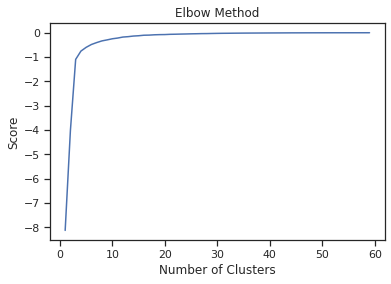

In [0]:
number_clusters = range(1, 60)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

As it is seen the clusters are good, only if the number of clusters are less than 10.

But reducing less than 10 clusters is not a good choice for our case.

so not changing any of the data by this.

# Grouping based on cosine similarity

In [0]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(data_Group_agg['Merged_Description'])

# creating a Series for the assignment group names so they are associated to an ordered numerical
# list to use later to match the indexes
indices = pd.Series(data_Group_agg.index)
indices[:5]

0     GRP_0
1     GRP_1
2    GRP_10
3    GRP_11
4    GRP_12
Name: Assignment_group, dtype: object

In [0]:
# creating cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [0]:
value_counts = data["Assignment_group"].value_counts().to_dict()

In [0]:
def get_similar_groups(group_name,n = 1, cosine_sim = cosine_sim):
    
    similar_groups = []
    
    # gettin the index of the group that matches the given group
    idx = indices[indices == group_name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_3_indexes = list(score_series.iloc[n:n+1].index)
    similarity_score = score_series.iloc[1]
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_3_indexes:
        similar_groups.append(list(data_Group_agg.index)[i])
        
    return similar_groups[0],similarity_score

In [0]:
grouping_df = pd.DataFrame(columns=['Assignment_group', 'total_count', 'similar_group','similarity_score'])

In [0]:
for key,value in value_counts.items():
  similar_grp , score = get_similar_groups(key)
  grouping_df= grouping_df.append({'Assignment_group': key, 'total_count': value, 'similar_group': similar_grp, 'similarity_score':score }, ignore_index=True)

In [0]:
grouping_df.head()

,Assignment_group,total_count,similar_group,similarity_score
0,GRP_0,3976,GRP_27,0.513974
1,GRP_8,661,GRP_4,0.648422
2,GRP_24,289,GRP_33,0.391628
3,GRP_12,257,GRP_1,0.596533
4,GRP_9,252,GRP_6,0.920685


In [0]:
grouping_df[grouping_df['total_count']< 10]

,Assignment_group,total_count,similar_group,similarity_score
49,GRP_52,9,GRP_68,0.366418
50,GRP_55,8,GRP_25,0.219870
51,GRP_51,8,GRP_4,0.265416
52,GRP_49,6,GRP_33,0.308622
53,GRP_46,6,GRP_11,0.331542
54,GRP_59,6,GRP_25,0.373046
55,GRP_43,5,GRP_0,0.270953
56,GRP_32,4,GRP_28,0.200023
57,GRP_66,4,GRP_65,0.143743
58,GRP_58,3,GRP_5,0.225568


The cosine similarity between groups is very low. let us see the groups with higher similarity

In [0]:
grouping_df[grouping_df['similarity_score']> 0.7]

,Assignment_group,total_count,similar_group,similarity_score
4,GRP_9,252,GRP_6,0.920685
8,GRP_6,184,GRP_9,0.920685
10,GRP_10,140,GRP_9,0.852010
11,GRP_5,129,GRP_9,0.891010
24,GRP_40,45,GRP_22,0.756374
27,GRP_15,39,GRP_40,0.710194
33,GRP_22,31,GRP_40,0.756374
40,GRP_60,20,GRP_5,0.873716


only very few groups have higher similarity.



*   GRP_6,GRP_10,GRP_5, GRP_60 similar to GRP_9

*   GRP_15,GRP_22 similar to GRP_40



In [0]:
data['Assignment_group'] = data['Assignment_group'].apply(lambda x: 'GRP_9' if x in ['GRP_6','GRP_10','GRP_5','GRP_60'] else x)
data['Assignment_group'] = data['Assignment_group'].apply(lambda x: 'GRP_40' if x in ['GRP_15','GRP_22'] else x)

In [0]:
data['Assignment_group'].nunique()

68

Now the number of groups are reduced to 68 from 74

# Combining the groups for model creation

In [0]:
#Combining Groups which has less than 20 data rows in the dataset
count = mydata['Assignment_group'].value_counts()
mydata["Assignment_group"] = mydata["Assignment_group"].apply(lambda x: 'GRP_20ROWorLESS' if count.get(x) < 20 else x)

In [0]:
print(mydata["Assignment_group"].unique())
print(mydata["Assignment_group"].unique())
print(mydata["Assignment_group"].value_counts())

['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_20ROWorLESS' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31'
 'GRP_33' 'GRP_34' 'GRP_40' 'GRP_41' 'GRP_42' 'GRP_45' 'GRP_47' 'GRP_48'
 'GRP_60' 'GRP_62']
42
GRP_0              3934
GRP_8               645
GRP_24              285
GRP_12              257
GRP_9               252
GRP_2               241
GRP_19              215
GRP_20ROWorLESS     206
GRP_3               200
GRP_6               183
GRP_13              145
GRP_10              140
GRP_5               128
GRP_14              118
GRP_25              116
GRP_33              107
GRP_4               100
GRP_29               97
GRP_18               88
GRP_16               85
GRP_31               69
GRP_7                68
GRP_17               68
GRP_34               62
GRP_26               56
GRP_40       

Gropu has reduced to 42 after combining the groups which has less rows the 20.

In [0]:
# Missing value treatment
mydata = mydata.fillna("")

In [0]:
mydata[mydata.isna().any(axis=1)]

,Short_description,Description,Assignment_group


In [0]:
# Removing duplicate rows from the dataset
mydata.drop_duplicates(inplace=True)
print(mydata.duplicated().sum())
print(mydata.shape)

0
(8417, 4)


In [0]:
#Droping caller from dataset
mydata.drop('Caller', axis=1, inplace=True)

In [0]:
len(mydata[mydata["Short_description"] == mydata["Description"]])
#len(same_description)

2818

In [0]:
#Replacing the Description with Blank where Description and Short_description is same
mydata.loc[mydata["Short_description"] == mydata["Description"], "Description"] = ""

In [0]:
print(len(mydata[mydata["Short_description"] == mydata["Description"]]))

print(mydata.shape)

0
(8417, 3)


In [0]:
#Pickling the dataset
#mydata.to_pickle('/content/drive/My Drive/Group_Modification.pickle')

In [0]:
Group_Modification = pd.read_pickle('/content/drive/My Drive/Group_Modification.pickle')

In [0]:
Group_Modification.head()

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_nltk_clean_NewGroups(text):
  #text = translate_text(text)
  text = replace_email_headers(text)
  text = replace_emailids(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_stop_words_nltk(text)
  return text

In [0]:
Group_Modification['Description'] = Group_Modification['Description'].apply(data_nltk_clean_NewGroups)
Group_Modification['Short_description'] = Group_Modification['Short_description'].apply(data_nltk_clean_NewGroups)
Group_Modification.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager checke...,GRP_0
1,outlook,team meetings skype meetings appearing outloo...,GRP_0
2,log vpn,log vpn,GRP_0
3,unable access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
# Removing the row which has same Description and Short Description
Group_Modification.loc[Group_Modification["Short_description"] == Group_Modification["Description"], "Description"] = ""

In [0]:
same_description_group = Group_Modification[Group_Modification["Short_description"] == Group_Modification["Description"]]
len(same_description_group)

0

In [0]:
# Merging Description and short Discription
Group_Modification['Merged_Description'] = Group_Modification[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
Group_Modification.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
Group_Modification.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
Group_Modification.drop_duplicates(inplace=True)
print(Group_Modification.duplicated().sum())
print(Group_Modification.shape)

0
(6846, 2)


In [0]:
# Changing cant and wont to can not and will not 
Group_Modification['Merged_Description'] = Group_Modification['Merged_Description'].str.replace("cant","cannot")
Group_Modification['Merged_Description'] = Group_Modification['Merged_Description'].str.replace("wont","willnot")

In [0]:
# Spiliting the data to get the length
sentence = Group_Modification['Merged_Description']
max_len = max([len(s.split()) for s in sentence])
min_len = min([len(s.split()) for s in sentence])

print(max_len)
print(min_len)


734
0


In [0]:
Group_Modification.Assignment_group = pd.Categorical(Group_Modification.Assignment_group)
Group_Modification['Assignment_group_new'] = Group_Modification.Assignment_group.cat.codes
Group_Modification.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
Group_Modification.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
#Pickling and reading the model
#Group_Modification.to_pickle('/content/drive/My Drive/Group_Modification_clean.pickle')

In [0]:
Group_Modification_clean = pd.read_pickle('/content/drive/My Drive/Group_Modification_clean.pickle')

In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

Group_Modification_clean['Merged_Description'] = Group_Modification_clean['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

Group_Modification_clean['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

Group_Modification_clean['Merged_Description'] = Group_Modification_clean['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
Group_Modification_clean.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
max_features = 15000
maxlen = 700 
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(Group_Modification_clean['Merged_Description'])
sequences = tokenizer.texts_to_sequences(Group_Modification_clean['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 12610 unique tokens.
(6846, 700)


In [0]:
X = tokenizer.texts_to_sequences(Group_Modification_clean['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(Group_Modification_clean['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6846
[ 28   8 155   4 106 125  75 324   4 228  10   2 552   4  28  57 435 283
  28   8 273   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12610 unique tokens.


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4792, 700)
(2054, 700)
(4792,)
(2054,)


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

12611


In [0]:
from keras.initializers import Constant
import re
Spacy_LSTM = Sequential()
Spacy_LSTM.add(Embedding(num_words, 300, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
Spacy_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
Spacy_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
Spacy_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Spacy_LSTM.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
48/48 [==============================] - 577s 12s/step - loss: 2.5111 - accuracy: 0.4629 - val_loss: 2.0397 - val_accuracy: 0.5156
Epoch 2/5
48/48 [==============================] - 569s 12s/step - loss: 1.7764 - accuracy: 0.5578 - val_loss: 1.6619 - val_accuracy: 0.5696
Epoch 3/5
48/48 [==============================] - 574s 12s/step - loss: 1.4092 - accuracy: 0.6375 - val_loss: 1.4995 - val_accuracy: 0.6061
Epoch 4/5
48/48 [==============================] - 572s 12s/step - loss: 1.1439 - accuracy: 0.6947 - val_loss: 1.4369 - val_accuracy: 0.6271
Epoch 5/5
48/48 [==============================] - 576s 12s/step - loss: 0.9460 - accuracy: 0.7481 - val_loss: 1.3969 - val_accuracy: 0.6256


In [0]:
pred = Spacy_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.6256085686465434
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       954
           1       0.00      0.00      0.00         8
           2       0.31      0.16      0.21        25
           3       0.00      0.00      0.00         9
           4       0.59      0.64      0.61        74
           5       0.33      0.53      0.41        43
           6       0.41      0.26      0.32        35
           7       0.80      0.36      0.50        11
           8       0.35      0.46      0.40        26
           9       1.00      0.80      0.89        20
          10       0.31      0.15      0.21        26
          11       0.47      0.12      0.20        64
          12       0.34      0.46      0.39        72
          13       0.00      0.00      0.00        11
          14       0.20      0.03      0.06        61
          15       0.00      0.00      0.00         8
          16       0.50      0.11      0.18   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Summary for phase 1

**EDA**

- Class imbalance of target variable is the major drawback with the data.
- GRP_0 is tagged to almost 50 percent of the tickets.
- Some assignment groups are merged which in total accounts for one percent of the data. These tickets have to be later handled by other mechanisms such as rule engine or manual assignment.
- Few missing values were found in description and short description column.They were treated by replacing with blank space.
- only around 3000 unique callers are found in the data.
- one particular caller has raised more than 800 tickets. Guess is that the particular caller is automated machine related to job scheduling.
- 83 duplicate tickets were found. Nearly 20 duplicate tickets were assigned to different groups. This might be incorrect_data.
- description contains many tickets in email format.
- short decription and description contains many non-ascii characters (especially GRP_30), date-time, german words, (yes/no/na)
- The highest frequency words in description and short description are mostly stopwords (the, in,from)


**Data Cleaning**

- Data cleaning was done on removing newline characters, non ascii characters, emailids, email attachments, stopwords, date-time, email headers, punctuations, numbers, german to english conversion.
- Data from short_description and description were merged into one column 'Merged_Description'
- columns namely Caller,short_description,description were removed from the dataframe
- duplicate records are removed
- snowball stemming is done
- dataframe is pickled for future use.



#Overall Observation
1.	The data looks good at first glance.
2.	There are 8500 records in total.
3.	Few values are missing in Short description column and Description column.
4.	Values in Caller and Assignment group looks ok with no missing value.
5.	All has object data type
6.	Out of 8500 records, there are 7481 unique Short_description and 7817 unique descriptions meaning that there are many issues which are repeating.
7.	this looks suspicious as there may be duplicate records. Let us analyze further to confirm that.
8.	Only 2950 unique callers are present. so number of tickets to number of users is in the ration 3:1
9.	One single user (bpctwhsn kzqsbmtp) has created 810 tickets.
10.	There are totally 74 unique records. So the problem statement is a multinomial classification
11.	GRP_0 has 3976 records (nearly 50 percent of the records). Clearly indicating Class imbalance
12.	There are 74 unique groups are named as GRP_0 to GRP_73
13.	Looking into the data from various assignment groups, we find that

    - there are many special characters (example :è½¬å‘: ç”³è¯·é€€æ¢è´§ï¼Œè´¨é‡) especailly GRP 48, 30, 31,62.
    -	Few groups contain german words
    -	Many data are in email format
    -	Many email ids and email headers are found.
    -	Many numbers and dates are found
    -	some groups can be clearly differentiated. For example , Group17 is mostly about reset password, Group 68 is about expense report, Group 66 is about cutview


14.	From the plot, it is clearly seen that the data is not uniformly distributed between classes.
15.	A major class imbalance problem will occur in this data.
16.	Long Tail Cutoff in the dataset

    -	As for most of the groups, data is very low.
    -	Last 24 groups have less than 10 records
    -	they sum up to 87 records which is about 1 percent of the data
    -	Let us group them into one class which can later be categorized manually or based on a rule engine.


17.	Now the last one percent data is grouped into the class GRP_10ROWorLESS which can later be categorized manually or based on a rule engine.


18.	Missing Values Treatment
   
    -	In the missing value records , atleast one of short description or description is present which is enough information for describing the ticket. so let us substitute the missing values with empty space.


19.	Analyzing Short description column

    -	Words - to, in , not ,job, password are the most frequent words.
    -	Many of these words are stopwords. Let us remove the standard   passwords from the wordcloud library and look into the plot
    -	After removing the stop words, we see that the most frequent words are - job,password,failed,job_scheduler.
    -	some interesting words we can see are - please , using, fA1/4r,probleme,uacyltoe


20.	Analyzing Description column

    -	Many of these words are stopwords. Let us remove the standard passwords from the wordcloud library and look into the plot
    -	After removing the stop words, we see that the most frequent words are - (yes/no/na),from:,received, received:
    -	some interesting words we can see are - please , need, 2016,aE", id:,monitoring_tool@company.com


21.	Analyzing Caller Column

    -	 Most of this callers ticket are related to job_scheduler and failed. This tells us that these tickets may be automated tickets related to scheduled jobs .This caller may be an automated system.


22.	From above EDA and looking at the excel manually, we have found the patterns which needs to be cleaned up.

    -	remove new line tags
    -	remove non ascii characters
    -	remove email ids
    -	remove email headers
    -	translate non-english words
    -	remove date-time
    -	remove attachments
    -	remove stop words
    -	remove punctuations
    -	remove numbers


23.	Created function to clean the data


# Model Building:
1.	**Basic Model Creation**

    -	Created a model with TfidfVectorizer and MultinomialNB
    -	Accuracy: 0.55 (55%)
    -	Accuracy is divided among the groups which has higher number of records
    -	For most of the groups accuracy if zero

2.	**Data Cleaning from punctuations, email, etc but keeping stop words to check if the model is performing any different with stop words in it.**
    -	Created Simple RNN, LSTM, Bidirectional LSTM models
    -	The model is not performing very well, but without removing stopwords it is expected. We are getting 46% Accuracy. We can try changing the hyperparameter and with more epoch 
    -	Test accuracy: 0.46
    -	Changing the hyperparameter also did not help and I am getting the same val_accuracy (46%). It seems like there is something wrong with the test split.
    -	Bidirectional LSTM is performing well and giving good accuracy with compare to previous runs(Test accuracy: 0.53). Maybe with more epoch, it will perform well.
    -	Accuracy with simple RNN is like previous models and val_accuracy is the same with all the epoch. Split is playing an important role here because there is a major class imbalance in the data.
    -	With glove embedding also, it is not performing well



3.	**Cleaning Dataset with the help of dictionary for the stop word**

    -	Created Simple RNN, LSTM, Bidirectional LSTM models
    -	After removing the words with the dictionary I don't see much improvement in the model as it is not giving very good accuracy and close to the previous models but it is showing little improvement (LSTM : Test accuracy: 47%).
    -	Simple RNN also doesn't show much improvement after data cleaning with the help of the dictionary. Val Accuracy is 47%
    -	Bidirectional LSTM is performing well but accuracy is same as the previous Bidirectional LSTM model that we have created with basic cleaning. So overall I don't see much improvement (Test accuracy: 0.52)


4.	**Cleaning the Data with Dictionary and nltk library**
    
    -	Created Simple RNN, LSTM, Bidirectional LSTM models
    -	After cleaning a lot of rows in both the columns 901 columns data became the same So I am planning to replace those to avoid duplicate.
    -	Max sentence length is 734 and min is zero which is strange. if sentence length is 0 then how is it going to help in creating a model and prediction. I am not sure if removing is a good idea because it might eliminate a few of the groups. It needs more investigation.
    -	After removing stopwords with the help of nltk and others I don't see much improvement with compare to previous models.
    -	Accuracy looks same with almost all kind of data cleaning.
    -	There is something wrong with the data distribution or maybe we need more investigation on combining the same groups together and create a model again.
    -	Language processing can also play an important role in this.
    -	Changed last layer to sigmoid, Training accuracy has increased with the last layer as sigmoid but test accuracy is still close to 50%.
    -	Tried changing the test data shape and given more data to test but Giving test set more values are not helping with this data distribution. Accuracy looks the same in all the epoch. (Test accuracy: 0.46 - 46%)
    -	Trying with less padding in the Dataset (300) 
    -	Tried lot of combinations like changing the dataset (increasing Test dataset size) changing the padding options, changing the max length, Tried with different activation functions but nothing seems to be helping here with the accuracy. In some cases, we have seen good accuracy with training data (97%) but testing accuracy was not good and the model looked overfit.


5.	**Cleaning Dataset with Spacy & Glove for the stop word**
    
    -	Created Simple RNN and Bidirectional LSTM models with the glove embedding “glove.6b.200d.text”
    -	Bidirectional LSTM for more epoch and Lemmatization. it is giving good accuracy with compare to other models(Test accuracy: 0.62  - 62%)
    -	With Simple RNN it is not performing well and giving the accuracy of 46%.
    -	With glove embedding and Bidirectional LSTM it is performing well and giving an accuracy of 63% which is good compared to all other models I have created with different data cleaning options. Individual group accuracy also looks ok. Insufficiency of data is present and proper grouping is required.


6.	**Bidirectional LSTM model with Different Glove Embeddings**
    
    -	Glove embedding is helping in improving the model’s accuracy with Bidirectional LSTM. So planning to create model with different glove embeddings.
    -	Tried glove.6B.200d.txt, glove.6B.300d.txt, glove.840B.300d.txt, and have observed little improvement with each embedding. 
    -	glove.6B.300d.txt is giving better results then glove.6B.200d.txt and shows the accuracy of 64% which is a little better compared to previous embeddings though it is a small improvement from 62% to 64%.
    -	With glove embedding glove.6B.300d.txt and glove.840B.300d.txt, model is performing the same, So I will continue with the glove.6B.300d.txt glove embedding for the model creation.


7. **Combining the groups on the basic of cosine similarity to improve the performance**

    - Tried cosine similarity and clustering technique to combine the groups but it did not help in improving the performance
    - Tried combining the minority class first with less than 10 rows and then with less than 20 rows.
    - With both the combining methods there is no visual improvement in the model and accuracy looks the same in all the cases.

# Conclusion
#### We have created a MultinomialNB, CNN, ANN, simple RNN, LSTM, Bidirectional LSTM models with and without glove embedding. We have tried multiple data cleaning techniques, changing hyperparameter, paddings, changes test train data split, different layers in the model, Combining the groups with cosine similarity, combining the minority groups( less than 10 and 20 rows to a single group), Number of epoch, different glove embeddings, etc. 

#### Bidirectional LSTM model is giving the best accuracy of 65% with the glove embedding. 

# Next Planned Improvement


Our next plan is to combine groups more accurately so that we can solve data issues related to class imbalance and trying new techniques and combinations to improve our model accuracy.
We will try new techniques to make a good predictor to solve Automatic Ticket Assignment issues


# **Model Improvement**

### Data Cleaning

In [0]:
#Making a copy of df dataframe
df_new = capstone.copy()
df_new.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_new_clean(text):
  #text = translate_text(text)
  text = replace_email_headers(text)
  text = replace_emailids(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_stop_words_nltk(text)
  return text

In [0]:
df_new['Description'] = df_new['Description'].apply(data_new_clean)
df_new['Short_description'] = df_new['Short_description'].apply(data_new_clean)
df_new.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager checke...,GRP_0
1,outlook,team meetings skype meetings appearing outloo...,GRP_0
2,log vpn,log vpn,GRP_0
3,unable access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
duplicate_records = df_new[df_new.duplicated()]
len(duplicate_records)

1564

In [0]:
same_description_new = df_new[df_new["Short_description"] == df_new["Description"]]
len(same_description_new)

901

After cleaning a lot of rows in both the columns 901 columns data became the same So I am planning to replace those to avoid duplicate.

In [0]:
df_new.loc[df_new["Short_description"] == df_new["Description"], "Description"] = ""

In [0]:
same_description_new = df_new[df_new["Short_description"] == df_new["Description"]]
len(same_description_new)

0

In [0]:
# Merging Description and short Discription
df_new['Merged_Description'] = df_new[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
df_new.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
df_new.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
df_new.drop_duplicates(inplace=True)
print(df_new.duplicated().sum())
print(df_new.shape)

0
(6847, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_new['Merged_Description'] = df_new['Merged_Description'].str.replace("cant","cannot")
df_new['Merged_Description'] = df_new['Merged_Description'].str.replace("wont","willnot")

In [0]:
# Spiliting the data to get the length
sentence = df_new['Merged_Description']
max_len = max([len(s.split()) for s in sentence])
min_len = min([len(s.split()) for s in sentence])

print(max_len)
print(min_len)

734
0


In [0]:
df_new['Assignment_group'].value_counts()

GRP_0              3180
GRP_8               322
GRP_24              278
GRP_12              245
GRP_2               239
GRP_19              214
GRP_3               200
GRP_13              142
GRP_14              117
GRP_25              116
GRP_33              107
GRP_29               97
GRP_4                96
GRP_10ROWorLESS      87
GRP_18               86
GRP_6                85
GRP_16               85
GRP_10               82
GRP_9                80
GRP_7                68
GRP_17               68
GRP_34               62
GRP_31               61
GRP_26               56
GRP_5                52
GRP_40               45
GRP_28               44
GRP_41               40
GRP_15               38
GRP_42               37
GRP_20               36
GRP_22               31
GRP_11               30
GRP_45               29
GRP_21               28
GRP_1                28
GRP_62               25
GRP_23               25
GRP_30               23
GRP_47               23
GRP_27               18
GRP_39          

Based on previous Cosine similarity code I am combining the groups who have high similarity.

In [0]:
df_new['Assignment_group'] = df_new['Assignment_group'].apply(lambda x: 'GRP_9' if x in ['GRP_6','GRP_10','GRP_5','GRP_60'] else x)
df_new['Assignment_group'] = df_new['Assignment_group'].apply(lambda x: 'GRP_40' if x in ['GRP_15','GRP_22'] else x)

In [0]:
df_new['Assignment_group'].nunique()

44

In [0]:
df_new.Assignment_group = pd.Categorical(df_new.Assignment_group)
df_new['Assignment_group_new'] = df_new.Assignment_group.cat.codes
df_new.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_new.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
df_new['Merged_Description'].value_counts()

 job job_ failed job_scheduler                                                                                                                                                                                                                                                 15
                                                                                                                                                                                                                                                                               11
 abended job job_scheduler job_  abended job job_scheduler job_                                                                                                                                                                                                                 7
 account locked                                                                                                                                                                   

In [0]:
# Pickling the data frame with cosine similarity group merged
df_new.to_pickle('/content/drive/My Drive/cosine_simlrty_data.pickle')

### Model with a merged group & cosine similarity

In [0]:
df_new = pd.read_pickle('/content/drive/My Drive/cosine_simlrty_data.pickle')
df_new.head()

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_new['Merged_Description'] = df_new['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_new['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
# Checking the records whose length is 0
df_new[df_new['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new
476,[],28
491,[],0
1081,[],36
1178,[],22
1352,[],42
2004,[],23
3326,[],11
4389,[],10
4876,[],17
5858,[],35


These value with length zero will not help so I am going to remove these rows

In [0]:
# Creating index so we can remove these records
min_len_desc = df_new[df_new['Merged_Description'].map(len) == 0].index

In [0]:
# Dropping the records with length zero
df_new.drop(min_len_desc, axis=0, inplace=True)

In [0]:
df_new[df_new['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new


In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_new['Merged_Description'] = df_new['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_new.head(5)


,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
print(df_new["Assignment_group_new"].unique())
print(df_new["Assignment_group_new"].nunique())

[ 0  1 21 29 43 41 42  3  4  5  6 30  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 22 23 24 25  2 26 27 31 32 33 34 35 37 38 28 36 39 40]
44


In [0]:
max_features = 15000
maxlen = 700 # max len
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_new['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_new['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 12610 unique tokens.
(6836, 700)


In [0]:
#Define X and y for your model and trying post padding
X = tokenizer.texts_to_sequences(df_new['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_new['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6836
[ 28   8 155   4 106 125  75 324   4 228  10   2 552   4  28  57 435 283
  28   8 273   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12610 unique tokens.


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4785, 700)
(2051, 700)
(4785,)
(2051,)


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

12611


In [0]:
from keras.initializers import Constant

New_LSTM = Sequential()
New_LSTM.add(Embedding(num_words, 300, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
New_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
New_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
New_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

New_LSTM.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 580s 12s/step - loss: 2.5703 - accuracy: 0.4623 - val_loss: 2.0438 - val_accuracy: 0.5154
Epoch 2/10
48/48 [==============================] - 576s 12s/step - loss: 1.8089 - accuracy: 0.5549 - val_loss: 1.6508 - val_accuracy: 0.5802
Epoch 3/10
48/48 [==============================] - 580s 12s/step - loss: 1.4172 - accuracy: 0.6351 - val_loss: 1.4851 - val_accuracy: 0.6124
Epoch 4/10
48/48 [==============================] - 579s 12s/step - loss: 1.1599 - accuracy: 0.6922 - val_loss: 1.4082 - val_accuracy: 0.6285
Epoch 5/10
48/48 [==============================] - 582s 12s/step - loss: 0.9609 - accuracy: 0.7427 - val_loss: 1.4004 - val_accuracy: 0.6309
Epoch 6/10
48/48 [==============================] - 584s 12s/step - loss: 0.7945 - accuracy: 0.7881 - val_loss: 1.3633 - val_accuracy: 0.6402
Epoch 7/10
48/48 [==============================] - 579s 12s/step - loss: 0.6392 - accuracy: 0.8347 - val_loss: 1.3802 - val_accuracy: 0.6319
Epoch 

In [0]:
pred = New_LSTM.predict(X_test)
pred = np.argmax(pred,axis=1)

In [0]:
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
print (classification_report(y_test, pred))

Accuracy score: 0.6421257922964407
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       954
           1       0.00      0.00      0.00         8
           2       0.14      0.04      0.06        26
           3       0.00      0.00      0.00         9
           4       0.54      0.53      0.54        73
           5       0.63      0.51      0.56        43
           6       0.32      0.31      0.32        35
           7       0.55      0.42      0.48        26
           8       0.82      0.90      0.86        20
           9       0.56      0.58      0.57        26
          10       0.40      0.30      0.34        64
          11       0.47      0.38      0.42        71
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         8
          14       0.75      0.75      0.75         8
          15       0.88      0.88      0.88        83
          16       0.82      0.51      0.63   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
df_new['Assignment_group_new'].value_counts()

0     3179
42     321
43     311
15     278
4      244
11     238
10     213
21     200
5      142
6      117
16     116
30     114
24     107
20      97
29      96
2       87
9       86
7       85
41      68
8       68
25      62
23      60
17      55
19      44
31      40
32      37
12      36
3       30
34      29
13      28
1       28
39      25
14      25
22      22
35      22
18      18
28      17
27      16
33      15
26      15
37      14
38      11
40      11
36       9
Name: Assignment_group_new, dtype: int64

### Model building with Traditionl ML models and Ensemble techniques

**Decision Tree**

In [0]:

## By default, criteria= Gini

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = classifier.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.model_selection import cross_val_score 

accuracies_dt= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_dt_mean=accuracies_dt.mean()*100
print("Mean Accuracy:Decision Tree=",accuracies_dt_mean)

accuracies_dt_std=accuracies_dt.std()*100
print("Standard Deviation - Accuracy:Decision Tree=",accuracies_dt_std)

[[640   2  11 ...   9   6  20]
 [  1   0   0 ...   0   2   1]
 [  8   0   0 ...   1   1   2]
 ...
 [ 13   0   0 ...   1   0   1]
 [ 13   2   1 ...   0  49  12]
 [ 20   2   1 ...   0  14  20]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       954
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         9
           4       0.18      0.14      0.15        73
           5       0.02      0.02      0.02        43
           6       0.02      0.03      0.03        35
           7       0.15      0.15      0.15        26
           8       0.79      0.95      0.86        20
           9       0.00      0.00      0.00        26
          10       0.10      0.09      0.10        64
          11       0.16      0.15      0.16        71
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy:Decision Tree= 38.03600597479058
Standard Deviation - Accuracy:Decision Tree= 1.566782663989124


**Using Entropy**

In [0]:
## Using Entropy

classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
#preds_entropy = model_entropy.predict(X_test)

accuracies_dt= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_dt_mean=accuracies_dt.mean()*100
print("Mean Accuracy:Decision Tree=",accuracies_dt_mean)

accuracies_dt_std=accuracies_dt.std()*100
print("Standard Deviation - Accuracy:Decision Tree=",accuracies_dt_std)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy:Decision Tree= 40.08298320245281
Standard Deviation - Accuracy:Decision Tree= 1.8979526349477047


**Using pruning**

In [0]:
## Using pruning

classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
classifier.fit(X_train, y_train)
#preds_entropy = model_entropy.predict(X_test)

accuracies_dt= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_dt_mean=accuracies_dt.mean()*100
print("Mean Accuracy:Decision Tree=",accuracies_dt_mean)

accuracies_dt_std=accuracies_dt.std()*100
print("Standard Deviation - Accuracy:Decision Tree=",accuracies_dt_std)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy:Decision Tree= 49.529659943571424
Standard Deviation - Accuracy:Decision Tree= 0.5556725288961534


**KNN with optimal Hyperparameters**

In [0]:
## KNN with optimal Hyperparameters

#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy: 0.4446611409068747
Confusion Metrix:
 [[859   8  23 ...  15  82  70]
 [  0   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  9   0   0 ...   0   8   4]
 [ 15   0   2 ...   0   2   7]]


**Bagging**

In [0]:
# Lets create new method to evaluate the model because I have changes train test names so original function will not work

def evaluateModel(model,name):
    print("######Evaluate the model %s ###########"%(name))
    print("Training Accuracy score : \t %s "%(model.score(X_train,y_train)))
    print("Test Accuracy score : \t %s "%(model.score(X_test,y_test)))

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

Bagging_All_features = BaggingRegressor(random_state=28)
Bagging_All_features.fit(X_train,y_train)

#Predict
y_pred=Bagging_All_features.predict(X_test)

#evaluate the model

evaluateModel(Bagging_All_features,"BaggingRegressor with all features")

######Evaluate the model BaggingRegressor with all features ###########
Training Accuracy score : 	 0.8514787548944984 
Test Accuracy score : 	 0.26206072946414405 


**Boosting**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
#Create model and fit train data
Boosting_All_features = GradientBoostingRegressor(random_state=28)
Boosting_All_features.fit(X_train,y_train)

#Predict
y_pred=Boosting_All_features.predict(X_test)

#evaluate the model

evaluateModel(Boosting_All_features,"GradientBoostingRegressor with all features")

######Evaluate the model GradientBoostingRegressor with all features ###########
Training Accuracy score : 	 0.3972930556385741 
Test Accuracy score : 	 0.2961213835983558 


**GradientBoostingRegressor with GridSearchCV**

In [0]:
#Using grid serach to find best parameter value for learning_rate and n_estimators

params = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

model_tuning = GridSearchCV(estimator = GradientBoostingRegressor(random_state=28), 
param_grid = params)

model_tuning.fit(X_train,y_train)

model_tuning.best_params_, model_tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 500}, 0.2878254674182858)

In [0]:
#Using grid serach to find best parameter value for max_depth ( use learning_rate and n_estimators from previous run)

params = {'max_depth':[2,3,4,5,6,7]}

model_tuning = GridSearchCV(estimator = GradientBoostingRegressor(random_state=28,learning_rate=0.05,n_estimators=500), 
param_grid = params)

model_tuning.fit(X_train,y_train)

model_tuning.best_params_, model_tuning.best_score_

({'max_depth': 6}, 0.29788174669652656)

In [0]:
#Using grid serach to find best parameter value for min_samples_split and min_samples_leaf 
#( use learning_rate , n_estimators and max_depth from previous run)

         
params = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

model_tuning = GridSearchCV(estimator = GradientBoostingRegressor(random_state=28,learning_rate=0.05,n_estimators=500,
                                                                 max_depth=6), 
param_grid = params)

model_tuning.fit(X_train,y_train)

model_tuning.best_params_, model_tuning.best_score_

In [0]:
#Using grid serach to find best parameter value for min_samples_split and min_samples_leaf 
#( use learning_rate , n_estimators , max_depth , min_samples_split and  min_samples_leaf from previous run)


params = {'max_features':[2,3,4,5,6,7]}

model_tuning = GridSearchCV(estimator = GradientBoostingRegressor(random_state=28,learning_rate=0.05,n_estimators=500,
                                                                 max_depth=6, min_samples_split=4 ,min_samples_leaf=1), 
param_grid = params)

model_tuning.fit(X_train,y_train)

model_tuning.best_params_, model_tuning.best_score_

In [0]:
#Using grid serach to find best parameter value for min_samples_split and min_samples_leaf 
#( use learning_rate , n_estimators , max_depth , min_samples_split ,  min_samples_leaf  and max_features from previous run)
%time

final_GBR_model = GradientBoostingRegressor(random_state=28,learning_rate=0.05,n_estimators=500,
                                                                 max_depth=6, min_samples_split=4 ,min_samples_leaf=1,max_features=7)

final_GBR_model.fit(X_train,y_train)

#Predict
y_pred=final_GBR_model.predict(X_test)

#evaluate the model

evaluateModel(final_GBR_model,"GradientBoostingRegressor model tuning")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
######Evaluate the model GradientBoostingRegressor model tuning ###########
Training Accuracy score : 	 0.3744274075518046 
Test Accuracy score : 	 0.21701250972270747 


Observation


Tried creating a model with Decision tree, Using Enrtopy, Using pruning, KNN with optimal Hyperparameters, Bagging, Boosting, GradientBoostingRegressor with GridSearchCV but not getting good results and getting accuracy between 40-50 %. With Bagging Testing accuracy is high(85%) but testing is low. it was expected with these models.

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25) ## Hyperparameter
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.model_selection import cross_val_score 

accuracies_logistic= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_logistic_mean=accuracies_logistic.mean()*100
print("Mean Accuracy:Random Forest=",accuracies_logistic_mean)

accuracies_logistic_std=accuracies_logistic.std()*100
print("Standard Deviation:Random Forest=",accuracies_logistic_std)

[[924   0   0 ...   1   2   2]
 [  7   0   0 ...   0   0   0]
 [ 23   0   0 ...   0   0   1]
 ...
 [ 20   0   0 ...   0   0   0]
 [ 31   1   0 ...   0  50  11]
 [ 64   1   0 ...   0  10  12]]
              precision    recall  f1-score   support

           0       0.53      0.97      0.69       954
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         9
           4       0.20      0.04      0.07        73
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        35
           7       1.00      0.04      0.07        26
           8       0.83      0.75      0.79        20
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        64
          11       0.52      0.23      0.31        71
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mean Accuracy:Random Forest= 52.62274962657558
Standard Deviation:Random Forest= 0.9492545851622307


**Support Vector Machine**

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix


model = SVC()
model.fit(X_train,y_train) 

predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[945   0   0 ...   0   0   0]
 [  8   0   0 ...   0   0   0]
 [ 26   0   0 ...   0   0   0]
 ...
 [ 19   0   0 ...   0   0   0]
 [ 96   0   0 ...   0   0   0]
 [ 93   0   0 ...   0   0   0]]


In [0]:
model=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[954   0   0 ...   0   0   0]
 [  8   0   0 ...   0   0   0]
 [ 26   0   0 ...   0   0   0]
 ...
 [ 20   0   0 ...   0   0   0]
 [ 96   0   0 ...   0   0   0]
 [ 93   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.63       954
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        73
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        64
          11       0.00      0.00      0.00        71
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation


Randon forest and SVM still performs well with compare to other models. Ramdon forest performs well and gives an accuracy of 52%. SVM also gets the job done and gives an accuracy of 47% (User random paraments for SVM as finding the best parameters is taking a lot of time).

### Model Creation after dropping groups with less then 20 records

In [0]:
#Making a copy of df dataframe
df_new = capstone.copy()
df_new.head(5)

,Short_description,Description,Assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
#Run functions in # Function to clean data before running below code 
def data_new_clean(text):
  #text = translate_text(text)
  text = replace_email_headers(text)
  text = replace_emailids(text)
  text = basic_clean(text)
  text = replcae_nonAsciiCharacters(text)
  text = remove_stop_words_nltk(text)
  return text

In [0]:
df_new['Description'] = df_new['Description'].apply(data_new_clean)
df_new['Short_description'] = df_new['Short_description'].apply(data_new_clean)
df_new.head()

,Short_description,Description,Assignment_group
0,login issue,verified user details employee manager checke...,GRP_0
1,outlook,team meetings skype meetings appearing outloo...,GRP_0
2,log vpn,log vpn,GRP_0
3,unable access hr_tool page,,GRP_0
4,skype error,,GRP_0


In [0]:
duplicate_records = df_new[df_new.duplicated()]
len(duplicate_records)

1564

In [0]:
same_description_new = df_new[df_new["Short_description"] == df_new["Description"]]
len(same_description_new)

901

In [0]:
df_new.loc[df_new["Short_description"] == df_new["Description"], "Description"] = ""

In [0]:
same_description_new = df_new[df_new["Short_description"] == df_new["Description"]]
len(same_description_new)

0

In [0]:
# Merging Description and short Discription
df_new['Merged_Description'] = df_new[['Short_description', 'Description']].apply(lambda x: ' '.join(x), axis = 1)
df_new.drop(["Short_description","Description"], axis = 1, inplace=True) #Droping columns
df_new.head(5)

,Assignment_group,Merged_Description
0,GRP_0,login issue verified user details employee m...
1,GRP_0,outlook team meetings skype meetings appeari...
2,GRP_0,log vpn log vpn
3,GRP_0,unable access hr_tool page
4,GRP_0,skype error


In [0]:
# Removing duplicate rows which are same in both the columns
df_new.drop_duplicates(inplace=True)
print(df_new.duplicated().sum())
print(df_new.shape)

0
(6847, 2)


In [0]:
# Changing cant and wont to can not and will not 
df_new['Merged_Description'] = df_new['Merged_Description'].str.replace("cant","cannot")
df_new['Merged_Description'] = df_new['Merged_Description'].str.replace("wont","willnot")

In [0]:
# Spiliting the data to get the length
sentence = df_new['Merged_Description']
max_len = max([len(s.split()) for s in sentence])
min_len = min([len(s.split()) for s in sentence])

print(max_len)
print(min_len)

734
0


In [0]:
#Combining Groups which has less than 10 data rows in the dataset
count = df_new['Assignment_group'].value_counts()
df_new["Assignment_group"] = df_new["Assignment_group"].apply(lambda x: 'GRP_20ROWorLESS' if count.get(x) < 20 else x)

In [0]:
df_new.drop( df_new[ df_new['Assignment_group'] == "GRP_20ROWorLESS" ].index , inplace=True)

In [0]:
df_new.drop( df_new[ df_new['Assignment_group'] == "GRP_10ROWorLESS" ].index , inplace=True)

In [0]:
df_new['Assignment_group'].value_counts()

GRP_0     3180
GRP_8      322
GRP_24     278
GRP_12     245
GRP_2      239
GRP_19     214
GRP_3      200
GRP_13     142
GRP_14     117
GRP_25     116
GRP_33     107
GRP_29      97
GRP_4       96
GRP_18      86
GRP_16      85
GRP_6       85
GRP_10      82
GRP_9       80
GRP_7       68
GRP_17      68
GRP_34      62
GRP_31      61
GRP_26      56
GRP_5       52
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      38
GRP_42      37
GRP_20      36
GRP_22      31
GRP_11      30
GRP_45      29
GRP_21      28
GRP_1       28
GRP_62      25
GRP_23      25
GRP_47      23
GRP_30      23
Name: Assignment_group, dtype: int64

In [0]:
df_new['Assignment_group'] = df_new['Assignment_group'].apply(lambda x: 'GRP_9' if x in ['GRP_6','GRP_10','GRP_5'] else x)
df_new['Assignment_group'] = df_new['Assignment_group'].apply(lambda x: 'GRP_40' if x in ['GRP_15','GRP_22'] else x)

In [0]:
df_new['Assignment_group'].nunique()

34

In [0]:
df_new.Assignment_group = pd.Categorical(df_new.Assignment_group)
df_new['Assignment_group_new'] = df_new.Assignment_group.cat.codes
df_new.drop(["Assignment_group"], axis = 1, inplace=True) #Droping columns
df_new.head(5)

,Merged_Description,Assignment_group_new
0,login issue verified user details employee m...,0
1,outlook team meetings skype meetings appeari...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_new['Merged_Description'] = df_new['Merged_Description'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_new['Merged_Description'].head(5)

0    [login, issue, verified, user, details, employ...
1    [outlook, team, meetings, skype, meetings, app...
2                                 [log, vpn, log, vpn]
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: Merged_Description, dtype: object

In [0]:
# Checking the records whose length is 0
df_new[df_new['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new
491,[],0
1178,[],20
1352,[],32
2004,[],21
3326,[],10
4389,[],9
4876,[],16
5858,[],29
7266,[],3


In [0]:
# Creating index so we can remove these records
min_len_desc = df_new[df_new['Merged_Description'].map(len) == 0].index

In [0]:
# Dropping the records with length zero
df_new.drop(min_len_desc, axis=0, inplace=True)

In [0]:
df_new[df_new['Merged_Description'].map(len) == 0]

,Merged_Description,Assignment_group_new


In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
def Word_lemmatizer(text):
  lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
  return lem_text

df_new['Merged_Description'] = df_new['Merged_Description'].apply(lambda x: Word_lemmatizer(x))
df_new.head(5)


,Merged_Description,Assignment_group_new
0,login issue verified user detail employee mana...,0
1,outlook team meeting skype meeting appearing o...,0
2,log vpn log vpn,0
3,unable access hr_tool page,0
4,skype error,0


In [0]:
print(df_new["Assignment_group_new"].unique())
print(df_new["Assignment_group_new"].nunique())

[ 0  1 19 24 33 31 32  2  3  4  5 25  6  7  8  9 10 11 12 13 14 15 16 17
 18 20 21 22 23 26 27 28 29 30]
34


In [0]:
max_features = 15000
maxlen = 600 # max len
embedding_size = 200

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_new['Merged_Description'])
sequences = tokenizer.texts_to_sequences(df_new['Merged_Description'])
word_index = tokenizer.word_index
print('Fount %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
print(data.shape)

Fount 12327 unique tokens.
(6611, 400)


In [0]:
#Define X and y for your model and trying post padding
X = tokenizer.texts_to_sequences(df_new['Merged_Description'])
X = pad_sequences(X, maxlen = maxlen, padding="post")
y = np.asarray(df_new['Assignment_group_new'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 6611
[ 27   8 147   4 105 122  81 327   4 225  10   2 525   4  27  57 426 273
  27   8 262   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12327 unique tokens.


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4627, 400)
(1984, 400)
(4627,)
(1984,)


In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.300d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

5001


In [0]:
from keras.initializers import Constant

New_LSTM = Sequential()
New_LSTM.add(Embedding(num_words, 300, input_length=maxlen,  embeddings_initializer=Constant(embedding_matrix)))
New_LSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
New_LSTM.add(Dense(50, activation='softmax'))

# try using different optimizers and different optimizer configs
New_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

New_LSTM.fit(X_train, y_train, batch_size=100, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
47/47 [==============================] - 482s 10s/step - loss: 2.3974 - accuracy: 0.4813 - val_loss: 1.8227 - val_accuracy: 0.5469
Epoch 2/15
47/47 [==============================] - 481s 10s/step - loss: 1.5951 - accuracy: 0.5835 - val_loss: 1.4606 - val_accuracy: 0.6099
Epoch 3/15
47/47 [==============================] - 483s 10s/step - loss: 1.2485 - accuracy: 0.6633 - val_loss: 1.3254 - val_accuracy: 0.6361
Epoch 4/15
47/47 [==============================] - 485s 10s/step - loss: 0.9971 - accuracy: 0.7212 - val_loss: 1.2469 - val_accuracy: 0.6568
Epoch 5/15
47/47 [==============================] - 481s 10s/step - loss: 0.8158 - accuracy: 0.7746 - val_loss: 1.2235 - val_accuracy: 0.6653
Epoch 6/15
47/47 [==============================] - 482s 10s/step - loss: 0.6605 - accuracy: 0.8180 - val_loss: 1.2148 - val_accuracy: 0.6689
Epoch 7/15
47/47 [==============================] - 488s 10s/step - loss: 0.5422 - accuracy: 0.8535 - val_loss: 1.2346 - val_accuracy: 0.6779
Epoch 

### Studying sentence length

**checking sentence length**

In [0]:
data = pd.read_pickle('/content/drive/My Drive/data_preprocessed.pickle')

In [0]:
data.head()

,Short_description,Description,Caller,Assignment_group,Merged_Description
0,login issue,verified user details employee manager checke...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee m...
1,outlook,team meetings skype meetings appearing outloo...,hmjdrvpb komuaywn,GRP_0,outlook team meetings skype meetings appeari...
2,log vpn,log vpn,eylqgodm ybqkwiam,GRP_0,log vpn log vpn
3,unable access hr_tool page,,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error


In [0]:
data['word_tokens'] = data['Merged_Description'].apply(word_tokenize)

In [0]:
Word_lengths = [len(s) for s in data['word_tokens']]

print("maximum word count{},minimum word count{}".format(max(Word_lengths),min(Word_lengths)))

maximum word count1077,minimum word count0


In [0]:
len(data[data["word_tokens"].map(len) == 0])

57

In [0]:
empty_row_indexes = data[data["word_tokens"].map(len) == 0].index
data.drop(empty_row_indexes, axis=0, inplace=True)

In [0]:
len(data[data["word_tokens"].map(len) == 0])

0

In [0]:
Word_lengths = [len(s) for s in data['word_tokens']]
print("maximum word count{},minimum word count{}".format(max(Word_lengths),min(Word_lengths)))

maximum word count1077,minimum word count1


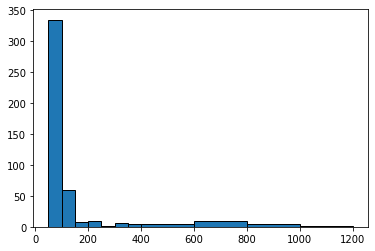

In [0]:
bins = [50,100,150,200,250,300,350,400,600,800,1000,1200]
plt.hist(Word_lengths,bins,edgecolor = 'black')
plt.show()

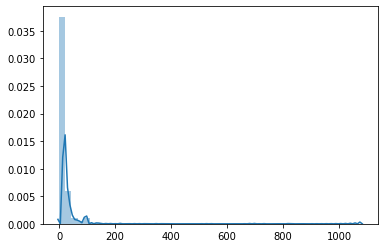

In [0]:
sns.distplot(Word_lengths)

In [0]:
unique_words = data['word_tokens'].apply(pd.Series).stack().unique()
len(unique_words)

13507

In [0]:
unique_words

array(['login', 'issue', 'verified', ..., 'mehreren', 'verschiedene',
       'prgramdntyme'], dtype=object)

**Token**

In [0]:
data.Assignment_group = pd.Categorical(data.Assignment_group)
data['Assignment_group_new'] = data.Assignment_group.cat.codes
data.head()

,Short_description,Description,Caller,Assignment_group,Merged_Description,word_tokens,Assignment_group_new
0,login issue,verified user details employee manager checke...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee m...,"[login, issue, verified, user, details, employ...",0
1,outlook,team meetings skype meetings appearing outloo...,hmjdrvpb komuaywn,GRP_0,outlook team meetings skype meetings appeari...,"[outlook, team, meetings, skype, meetings, app...",0
2,log vpn,log vpn,eylqgodm ybqkwiam,GRP_0,log vpn log vpn,"[log, vpn, log, vpn]",0
3,unable access hr_tool page,,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,"[unable, access, hr_tool, page]",0
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error,"[skype, error]",0


In [0]:
X = data.drop(['Assignment_group','Assignment_group_new'],axis =1)

In [0]:
y = np.asarray(data['Assignment_group_new'])

In [0]:
X.shape

(8443, 5)

In [0]:
y.shape

(8443,)

In [0]:
X_train_data, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

In [0]:
X_train_data.shape

(6754, 5)

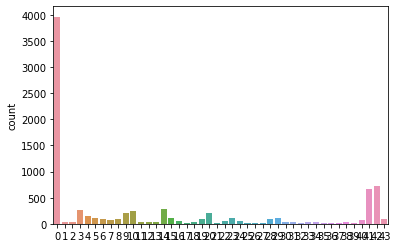

In [0]:
sns.countplot(y)

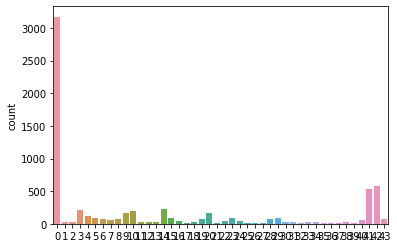

In [0]:
sns.countplot(y_train)

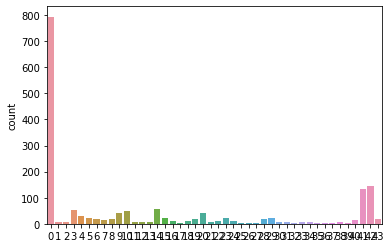

In [0]:
sns.countplot(y_test)

In [0]:
# hyper-parameters for tokenization
max_features = 20000
maxlen = 800

### Identifying problems with Glove tokenization

In [0]:
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.200d.txt.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['Merged_Description'])
sequences = tokenizer.texts_to_sequences(data['Merged_Description'])
word_index = tokenizer.word_index
X = pad_sequences(sequences, maxlen=maxlen)

In [0]:
not_found_in_glove_words = []
for word in unique_words:
  if embeddings.get(word) is None:
    not_found_in_glove_words.append(word)

In [0]:
len(not_found_in_glove_words)

7347

In [0]:
not_found_in_glove_words_tokenizer = []
for word,i in tokenizer.word_index.items():
  if embeddings.get(word) is None:
    not_found_in_glove_words_tokenizer.append(word)

In [0]:
len(not_found_in_glove_words_tokenizer)

6893

### Creating own glove embedding

In [0]:
pip install glove_python

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700250 sha256=c3791e6ef7aba77823a948be704ac5ed0e66e293801646b43f3249413042ad04
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [0]:
#importing the glove library
from glove import Corpus, Glove

In [0]:
descrip_list = X_train_data['word_tokens'].tolist()

In [0]:
len(descrip_list)

6754

In [0]:
descrip_list[:5]

[['confirmations',
  'bls',
  'beschichtungsleitstand',
  'transfered',
  'eu_tool',
  'location',
  'germany',
  'coating',
  'department',
  'cvd',
  'batch',
  'regularly',
  'order',
  'miss',
  'confirmation',
  'packing',
  'fhurakgsl',
  'mldufqov',
  'eu_tool',
  'german',
  'packen',
  'zum',
  'beschichten',
  'confirmed',
  'bls',
  'confirmations',
  'bls',
  'transfered',
  'automatically',
  'eu_tool',
  'production',
  'planner',
  'close',
  'gaps',
  'manually',
  'confirming',
  'missing',
  'process',
  'steps',
  'incident',
  'impact',
  'performance',
  'indicators',
  'time',
  'packing',
  'credited',
  'system',
  'batch',
  'current',
  'issue',
  'arised',
  'past'],
 ['verbindung',
  'zwischen',
  'drucker',
  'em',
  'und',
  'pc',
  'eemw',
  'kann',
  'nicht',
  'hergestellt',
  'werden'],
 ['node',
  'hostname_',
  'located',
  'usa',
  'node',
  'hostname_',
  'located',
  'usa',
  'node',
  'due',
  'power',
  'flap',
  'check',
  'site',
  'admin',
  

In [0]:
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(descrip_list, window=10)

In [0]:
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=128, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save(project_path + 'glove.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [0]:
glove.word_vectors.shape

(11891, 128)

In [0]:
glove.word_vectors[glove.dictionary['samsung']]

array([-1.80026522e-02, -2.54333724e-02,  1.58889013e-02, -1.05414374e-02,
        3.67362869e-03, -7.62526000e-03, -1.57395163e-02, -1.26908285e-02,
        1.74674825e-02, -4.54882888e-02, -4.48795508e-03, -2.50573658e-02,
       -3.11129620e-02, -1.02099791e-02,  4.26363721e-02,  1.35365307e-02,
        2.99441624e-02,  1.27835619e-02, -1.02380829e-02,  1.42936861e-03,
       -1.24028960e-02, -1.73911392e-02,  5.48889571e-03, -5.71930269e-02,
        1.54498535e-02,  4.52247100e-03,  3.96131971e-02, -3.33879704e-04,
       -8.02674012e-03,  1.48070902e-02, -1.13318335e-02,  7.15295030e-03,
        2.64086217e-02,  1.43687271e-02,  3.19594152e-02,  3.74963077e-02,
        2.14309791e-02,  1.11949782e-02, -3.88234144e-02, -1.91778954e-02,
       -3.18272148e-02,  2.17241438e-02, -2.83437553e-02, -6.18327147e-03,
        7.71473969e-03,  1.17158960e-03, -2.69114814e-02, -3.67512472e-03,
       -2.93385452e-02, -4.55812763e-02,  5.83407547e-03, -5.30755628e-02,
       -2.15700481e-02,  

In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 128

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = glove.dictionary.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = glove.word_vectors[glove.dictionary[word]]
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

13137


In [0]:
embedding_matrix.shape

(13137, 128)

### ANN model

In [0]:
# Model configuration
batch_size = 128

loss_function = 'sparse_categorical_crossentropy'
no_epochs = 16
optimizer = 'adam'
validation_split = 0.2
verbosity = 1
num_folds = 10

In [0]:
output_dir = "/content/drive/My Drive/dense/"
embedding_size = 128
n_dense = 128
dropout =0.2

In [0]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  model = Sequential()
  model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  model.add(Flatten())
  model.add(Dense(n_dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/weights.{epoch:02d}.hdf5")

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 16s 373ms/step - loss: 2.2178 - accuracy: 0.5384 - val_loss: 1.8741 - val_accuracy: 0.5477
Epoch 2/16
43/43 [==============================] - 16s 365ms/step - loss: 1.5644 - accuracy: 0.6245 - val_loss: 1.7192 - val_accuracy: 0.5840
Epoch 3/16
43/43 [==============================] - 16s 366ms/step - loss: 1.2878 - accuracy: 0.6833 - val_loss: 1.6214 - val_accuracy: 0.6136
Epoch 4/16
43/43 [==============================] - 16s 368ms/step - loss: 1.0387 - accuracy: 0.7311 - val_loss: 1.5719 - val_accuracy: 0.6129
Epoch 5/16
43/43 [==============================] - 16s 368ms/step - loss: 0.8383 - accuracy: 0.7822 - val_loss: 1.5933 - val_accuracy: 0.6188
Epoch 6/16
43/43 [==============================] - 16s 367ms/step - loss: 0.6886 - accuracy: 0.8173 - val_loss: 1.5545 - val_accuracy: 0.6358
Epoch 7/16
43/43 [===========================

In [0]:
pred = model.predict(X[test])
pred = np.argmax(pred,axis=1)
print (classification_report(y[test], pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       794
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         6
           3       0.39      0.59      0.47        51
           4       0.44      0.48      0.46        29
           5       0.20      0.17      0.18        24
           6       0.43      0.18      0.25        17
           7       0.88      0.94      0.91        16
           8       0.15      0.11      0.13        18
           9       0.29      0.26      0.27        43
          10       0.34      0.29      0.31        48
          11       0.00      0.00      0.00         7
          12       0.50      0.17      0.25         6
          13       1.00      0.20      0.33         5
          14       0.76      0.90      0.83        58
          15       0.30      0.26      0.28        23
          16       0.14      0.09      0.11        11
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CNN model

In [0]:
n_conv = 256 # filters, a.k.a. kernels
k_conv = 3 # kernel length
drop_embed = 0.2

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(n_conv, k_conv, activation='relu'))
  conv_model.add(GlobalMaxPooling1D())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(dropout))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 56s 1s/step - loss: 2.4668 - accuracy: 0.5093 - val_loss: 1.9938 - val_accuracy: 0.5581
Epoch 2/16
43/43 [==============================] - 60s 1s/step - loss: 1.8875 - accuracy: 0.5654 - val_loss: 1.8008 - val_accuracy: 0.5722
Epoch 3/16
43/43 [==============================] - 56s 1s/step - loss: 1.6850 - accuracy: 0.5895 - val_loss: 1.7117 - val_accuracy: 0.5744
Epoch 4/16
43/43 [==============================] - 56s 1s/step - loss: 1.5168 - accuracy: 0.6163 - val_loss: 1.5875 - val_accuracy: 0.6188
Epoch 5/16
43/43 [==============================] - 56s 1s/step - loss: 1.3744 - accuracy: 0.6446 - val_loss: 1.5229 - val_accuracy: 0.6188
Epoch 6/16
43/43 [==============================] - 56s 1s/step - loss: 1.2510 - accuracy: 0.6639 - val_loss: 1.4939 - val_accuracy: 0.6255
Epoch 7/16
43/43 [==============================] - 56s 1s/step

### Hypertuning the Convolution units

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(128, k_conv, activation='relu'))
  conv_model.add(GlobalMaxPooling1D())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(dropout))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 32s 743ms/step - loss: 2.6045 - accuracy: 0.5012 - val_loss: 2.0609 - val_accuracy: 0.5374
Epoch 2/16
43/43 [==============================] - 32s 742ms/step - loss: 1.9398 - accuracy: 0.5541 - val_loss: 1.8568 - val_accuracy: 0.5448
Epoch 3/16
43/43 [==============================] - 32s 743ms/step - loss: 1.7640 - accuracy: 0.5664 - val_loss: 1.7469 - val_accuracy: 0.5722
Epoch 4/16
43/43 [==============================] - 32s 741ms/step - loss: 1.6008 - accuracy: 0.5965 - val_loss: 1.6503 - val_accuracy: 0.6070
Epoch 5/16
43/43 [==============================] - 32s 742ms/step - loss: 1.4545 - accuracy: 0.6332 - val_loss: 1.5654 - val_accuracy: 0.6181
Epoch 6/16
43/43 [==============================] - 32s 733ms/step - loss: 1.3249 - accuracy: 0.6520 - val_loss: 1.5148 - val_accuracy: 0.6188
Epoch 7/16
43/43 [===========================

### Convolutional network with deeper layers

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(128, 5, activation='relu'))
  conv_model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))
  conv_model.add(Conv1D(n_conv, 5, activation='relu'))
  conv_model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))
  conv_model.add(Conv1D(512, 5, activation='relu'))
  conv_model.add(MaxPooling1D(pool_size=2,strides=2,padding='same'))
  conv_model.add(Flatten())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(dropout))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 179s 4s/step - loss: 2.4573 - accuracy: 0.5125 - val_loss: 2.1049 - val_accuracy: 0.5329
Epoch 2/16
43/43 [==============================] - 182s 4s/step - loss: 1.9583 - accuracy: 0.5438 - val_loss: 1.8525 - val_accuracy: 0.5440
Epoch 3/16
43/43 [==============================] - 179s 4s/step - loss: 1.7569 - accuracy: 0.5630 - val_loss: 1.7249 - val_accuracy: 0.5492
Epoch 4/16
43/43 [==============================] - 179s 4s/step - loss: 1.6117 - accuracy: 0.5882 - val_loss: 1.6948 - val_accuracy: 0.5833
Epoch 5/16
43/43 [==============================] - 181s 4s/step - loss: 1.4420 - accuracy: 0.6267 - val_loss: 1.6479 - val_accuracy: 0.5892
Epoch 6/16
43/43 [==============================] - 179s 4s/step - loss: 1.2776 - accuracy: 0.6528 - val_loss: 1.6145 - val_accuracy: 0.6003
Epoch 7/16
43/43 [==============================] - 180s 

### Simple RNN

In [0]:
n_rnn = 256
drop_rnn = 0.2

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  rnn_model = Sequential()
  rnn_model.add(Embedding(max_features, embedding_size, input_length=maxlen))
  rnn_model.add(SpatialDropout1D(drop_embed))
  rnn_model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
  rnn_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/rnn_weights.{epoch:02d}.hdf5")

  # Compile the model
  rnn_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = rnn_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = rnn_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {rnn_model.metrics_names[0]} of {scores[0]}; {rnn_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 95s 2s/step - loss: 2.4740 - accuracy: 0.4503 - val_loss: 2.2735 - val_accuracy: 0.4663
Epoch 2/16
43/43 [==============================] - 94s 2s/step - loss: 2.0579 - accuracy: 0.5343 - val_loss: 2.0589 - val_accuracy: 0.4885
Epoch 3/16
43/43 [==============================] - 94s 2s/step - loss: 1.7192 - accuracy: 0.5715 - val_loss: 1.7805 - val_accuracy: 0.5759
Epoch 4/16
43/43 [==============================] - 94s 2s/step - loss: 1.6240 - accuracy: 0.5962 - val_loss: 2.4594 - val_accuracy: 0.4789
Epoch 5/16
43/43 [==============================] - 95s 2s/step - loss: 2.1355 - accuracy: 0.5221 - val_loss: 2.0192 - val_accuracy: 0.5618
Epoch 6/16
43/43 [==============================] - 98s 2s/step - loss: 1.7838 - accuracy: 0.5788 - val_loss: 1.8976 - val_accuracy: 0.5588
Epoch 7/16
43/43 [==============================] - 95s 2s/step

### LSTM

In [0]:
n_lstm = 128 
drop_lstm = 0.2

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  lstm_model = Sequential()
  lstm_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  lstm_model.add(SpatialDropout1D(drop_embed))
  lstm_model.add(LSTM(n_lstm, dropout=drop_lstm))
  #lstm_model.add(Dense(n_dense, activation='relu'))
  #lstm_model.add(Dropout(dropout))
  lstm_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/lstm_weights.{epoch:02d}.hdf5")

  # Compile the model
  lstm_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = lstm_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = lstm_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {lstm_model.metrics_names[0]} of {scores[0]}; {lstm_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 150s 3s/step - loss: 2.5716 - accuracy: 0.4936 - val_loss: 2.0240 - val_accuracy: 0.5359
Epoch 2/16
43/43 [==============================] - 147s 3s/step - loss: 1.8980 - accuracy: 0.5545 - val_loss: 1.8332 - val_accuracy: 0.5448
Epoch 3/16
43/43 [==============================] - 141s 3s/step - loss: 1.7046 - accuracy: 0.5793 - val_loss: 1.7026 - val_accuracy: 0.5803
Epoch 4/16
43/43 [==============================] - 144s 3s/step - loss: 1.5036 - accuracy: 0.6185 - val_loss: 1.5655 - val_accuracy: 0.6188
Epoch 5/16
43/43 [==============================] - 146s 3s/step - loss: 1.3241 - accuracy: 0.6496 - val_loss: 1.4738 - val_accuracy: 0.6306
Epoch 6/16
43/43 [==============================] - 140s 3s/step - loss: 1.1646 - accuracy: 0.6859 - val_loss: 1.4219 - val_accuracy: 0.6417
Epoch 7/16
43/43 [==============================] - 140s 

In [0]:
pred = lstm_model.predict(X[test])
pred = np.argmax(pred,axis=1)
print (classification_report(y[test], pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       794
           1       0.00      0.00      0.00         6
           2       0.50      0.17      0.25         6
           3       0.59      0.51      0.55        51
           4       0.30      0.66      0.41        29
           5       0.30      0.33      0.31        24
           6       0.25      0.12      0.16        17
           7       0.88      0.94      0.91        16
           8       0.23      0.50      0.32        18
           9       0.31      0.35      0.33        43
          10       0.43      0.50      0.46        48
          11       0.00      0.00      0.00         7
          12       1.00      0.17      0.29         6
          13       0.50      0.40      0.44         5
          14       0.78      0.84      0.81        58
          15       0.37      0.61      0.46        23
          16       0.00      0.00      0.00        11
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bidirectional LSTM

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X_train, y_train):

  # Define the model architecture
  bi_lstm_model = Sequential()
  bi_lstm_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  bi_lstm_model.add(SpatialDropout1D(drop_embed))
  bi_lstm_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
  #bi_lstm_model.add(Dense(n_dense, activation='relu'))
  #bi_lstm_model.add(Dropout(dropout))
  bi_lstm_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/bi_lstm_weights.{epoch:02d}.hdf5")

  # Compile the model
  bi_lstm_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = bi_lstm_model.fit(X_train[train], y_train[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = bi_lstm_model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {bi_lstm_model.metrics_names[0]} of {scores[0]}; {bi_lstm_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
34/34 [==============================] - 482s 14s/step - loss: 2.4292 - accuracy: 0.5042 - val_loss: 1.9389 - val_accuracy: 0.5356
Epoch 2/16
34/34 [==============================] - 477s 14s/step - loss: 1.8702 - accuracy: 0.5474 - val_loss: 1.7190 - val_accuracy: 0.5856
Epoch 3/16
34/34 [==============================] - 475s 14s/step - loss: 1.9806 - accuracy: 0.5310 - val_loss: 1.8534 - val_accuracy: 0.5365
Epoch 4/16
34/34 [==============================] - 475s 14s/step - loss: 1.7079 - accuracy: 0.5678 - val_loss: 1.6485 - val_accuracy: 0.5893
Epoch 5/16
34/34 [==============================] - 475s 14s/step - loss: 1.5308 - accuracy: 0.6148 - val_loss: 1.5673 - val_accuracy: 0.6105
Epoch 6/16
34/34 [==============================] - 472s 14s/step - loss: 1.4003 - accuracy: 0.6374 - val_loss: 1.4953 - val_accuracy: 0.6124
Epoch 7/16
34/34 [==============================] -

KeyboardInterrupt: ignored

### Stacked Conv net

In [0]:
mp_size = 4

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X_train, y_train):

  # Define the model architecture
  stacked_bi_lstm_model = Sequential()
  stacked_bi_lstm_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  stacked_bi_lstm_model.add(SpatialDropout1D(drop_embed))
  stacked_bi_lstm_model.add(Conv1D(n_conv, k_conv, activation='relu'))
  stacked_bi_lstm_model.add(MaxPooling1D(mp_size))
  stacked_bi_lstm_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
  #stacked_bi_lstm_model.add(Dense(n_dense, activation='relu'))
  #stacked_bi_lstm_model.add(Dropout(dropout))
  stacked_bi_lstm_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/stacked_lstm_weights.{epoch:02d}.hdf5")

  # Compile the model
  stacked_bi_lstm_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = stacked_bi_lstm_model.fit(X_train[train], y_train[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = stacked_bi_lstm_model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {stacked_bi_lstm_model.metrics_names[0]} of {scores[0]}; {stacked_bi_lstm_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
34/34 [==============================] - 191s 6s/step - loss: 2.3775 - accuracy: 0.5169 - val_loss: 1.8984 - val_accuracy: 0.5375
Epoch 2/16
34/34 [==============================] - 186s 5s/step - loss: 1.8309 - accuracy: 0.5592 - val_loss: 1.7017 - val_accuracy: 0.5883
Epoch 3/16
34/34 [==============================] - 185s 5s/step - loss: 1.5878 - accuracy: 0.5972 - val_loss: 1.5560 - val_accuracy: 0.6105
Epoch 4/16
34/34 [==============================] - 187s 6s/step - loss: 1.3805 - accuracy: 0.6430 - val_loss: 1.4537 - val_accuracy: 0.6244
Epoch 5/16
34/34 [==============================] - 187s 5s/step - loss: 1.2044 - accuracy: 0.6779 - val_loss: 1.4241 - val_accuracy: 0.6226
Epoch 6/16
34/34 [==============================] - 187s 6s/step - loss: 1.0503 - accuracy: 0.7166 - val_loss: 1.4018 - val_accuracy: 0.6512
Epoch 7/16
34/34 [==============================] - 190s 

### Stacked Bidirectional LSTM with Deeper layers

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X_train, y_train):

  # Define the model architecture
  stacked_bi_lstm_model = Sequential()
  stacked_bi_lstm_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  stacked_bi_lstm_model.add(SpatialDropout1D(drop_embed))
  stacked_bi_lstm_model.add(Conv1D(n_conv, k_conv, activation='relu'))
  stacked_bi_lstm_model.add(MaxPooling1D(mp_size))
  stacked_bi_lstm_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
  stacked_bi_lstm_model.add(Dense(n_dense, activation='relu'))
  stacked_bi_lstm_model.add(Dropout(dropout))
  stacked_bi_lstm_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/stacked_lstm_weights.{epoch:02d}.hdf5")

  # Compile the model
  stacked_bi_lstm_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = stacked_bi_lstm_model.fit(X_train[train], y_train[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = stacked_bi_lstm_model.evaluate(X_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {stacked_bi_lstm_model.metrics_names[0]} of {scores[0]}; {stacked_bi_lstm_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
34/34 [==============================] - 192s 6s/step - loss: 2.4116 - accuracy: 0.5083 - val_loss: 1.9416 - val_accuracy: 0.5504
Epoch 2/16
34/34 [==============================] - 195s 6s/step - loss: 1.9109 - accuracy: 0.5507 - val_loss: 1.7386 - val_accuracy: 0.5763
Epoch 3/16
34/34 [==============================] - 191s 6s/step - loss: 1.6821 - accuracy: 0.5944 - val_loss: 1.5929 - val_accuracy: 0.6013
Epoch 4/16
34/34 [==============================] - 191s 6s/step - loss: 1.4855 - accuracy: 0.6351 - val_loss: 1.5191 - val_accuracy: 0.6281
Epoch 5/16
34/34 [==============================] - 196s 6s/step - loss: 1.3064 - accuracy: 0.6557 - val_loss: 1.4801 - val_accuracy: 0.6318
Epoch 6/16
34/34 [==============================] - 190s 6s/step - loss: 1.1748 - accuracy: 0.6881 - val_loss: 1.4961 - val_accuracy: 0.6253
Epoch 7/16
34/34 [==============================] - 190s 

### Upsampling with smote

In [0]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_upsampled, y_train_upsampled = sm.fit_sample(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

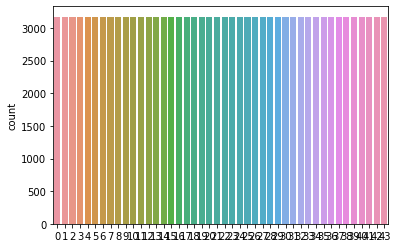

In [0]:
sns.countplot(y_train_upsampled)

In [0]:
X_train_upsampled.shape

(139612, 800)

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X_train_upsampled, y_train_upsampled):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(n_conv, k_conv, activation='relu'))
  conv_model.add(GlobalMaxPooling1D())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(dropout))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X_train_upsampled[train], y_train_upsampled[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X_train_upsampled[test], y_train_upsampled[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
699/699 [==============================] - 962s 1s/step - loss: 3.3695 - accuracy: 0.1176 - val_loss: 3.0964 - val_accuracy: 0.1660
Epoch 2/16
699/699 [==============================] - 964s 1s/step - loss: 3.0413 - accuracy: 0.1851 - val_loss: 2.8966 - val_accuracy: 0.2280
Epoch 3/16
699/699 [==============================] - 961s 1s/step - loss: 2.8340 - accuracy: 0.2384 - val_loss: 2.7590 - val_accuracy: 0.2625
Epoch 4/16
699/699 [==============================] - 959s 1s/step - loss: 2.6528 - accuracy: 0.2837 - val_loss: 2.6506 - val_accuracy: 0.2919
Epoch 5/16
699/699 [==============================] - 955s 1s/step - loss: 2.4896 - accuracy: 0.3223 - val_loss: 2.5721 - val_accuracy: 0.3088
Epoch 6/16
699/699 [==============================] - 958s 1s/step - loss: 2.3472 - accuracy: 0.3555 - val_loss: 2.5356 - val_accuracy: 0.3335
Epoch 7/16
699/699 [=========================

### Spell correction and translation with Glove 300D

In [0]:
pip install pyspellchecker

     |████████████████████████████████| 1.9MB 5.0MB/s 


In [0]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [0]:
project_path =  "/content/drive/My Drive/"
glove_file = project_path + "glove.6B.300d.txt"

In [0]:
embeddings = {}
for o in open(glove_file, encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
len(embeddings['samsung'])

300

In [0]:
pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=c15b3cb11c601afab52fecc9706f9e8061b20ac47f20e479236a400664490230
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [0]:
from googletrans import Translator
def translate_text(text):
  translator = Translator()
  translated_text = translator.translate(text)
  return translated_text.text

In [0]:
def process_word(text):
  spell = SpellChecker()
  return spell.correction(word)

In [0]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_size = 300# for each word in out tokenizer lets try to find that work in our w2v model
# first create a matrix of zeros, this is our embedding matrix
embedding_matrix_300d = np.zeros((num_words, embedding_size))
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix_300d[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        word = process_word(word)
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
          embedding_matrix_300d[i] = embedding_vector
        else:
           embedding_matrix_300d[i] = np.random.randn(embedding_size)



13137


### CNN Model

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix_300d)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(128, k_conv, activation='relu'))
  conv_model.add(GlobalMaxPooling1D())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(dropout))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 70s 2s/step - loss: 2.4263 - accuracy: 0.4944 - val_loss: 1.8879 - val_accuracy: 0.5596
Epoch 2/16
43/43 [==============================] - 69s 2s/step - loss: 1.7327 - accuracy: 0.5845 - val_loss: 1.6636 - val_accuracy: 0.6003
Epoch 3/16
43/43 [==============================] - 70s 2s/step - loss: 1.4549 - accuracy: 0.6258 - val_loss: 1.5025 - val_accuracy: 0.6188
Epoch 4/16
43/43 [==============================] - 71s 2s/step - loss: 1.2290 - accuracy: 0.6772 - val_loss: 1.4136 - val_accuracy: 0.6314
Epoch 5/16
43/43 [==============================] - 70s 2s/step - loss: 1.0482 - accuracy: 0.7174 - val_loss: 1.3534 - val_accuracy: 0.6432
Epoch 6/16
43/43 [==============================] - 70s 2s/step - loss: 0.8804 - accuracy: 0.7572 - val_loss: 1.3144 - val_accuracy: 0.6566
Epoch 7/16
43/43 [==============================] - 70s 2s/step

In [0]:
pred = conv_model.predict(X[test])
pred = np.argmax(pred,axis=1)
print (classification_report(y[test], pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       794
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         6
           3       0.53      0.61      0.57        51
           4       0.65      0.38      0.48        29
           5       0.53      0.38      0.44        24
           6       0.23      0.18      0.20        17
           7       0.80      0.75      0.77        16
           8       0.42      0.28      0.33        18
           9       0.42      0.35      0.38        43
          10       0.46      0.46      0.46        48
          11       0.10      0.14      0.12         7
          12       0.00      0.00      0.00         6
          13       0.75      0.60      0.67         5
          14       0.95      0.71      0.81        58
          15       0.71      0.43      0.54        23
          16       0.20      0.09      0.13        11
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hypertuning Droupout parameters

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  conv_model = Sequential()
  conv_model.add(Embedding(num_words, 300, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix_300d)))
  conv_model.add(SpatialDropout1D(drop_embed))
  conv_model.add(Conv1D(128, k_conv, activation='relu'))
  conv_model.add(GlobalMaxPooling1D())
  conv_model.add(Dense(n_dense, activation='relu'))
  conv_model.add(Dropout(0.5))
  conv_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/conv_weights.{epoch:02d}.hdf5")

  # Compile the model
  conv_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = conv_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = conv_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {conv_model.metrics_names[0]} of {scores[0]}; {conv_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 71s 2s/step - loss: 2.7191 - accuracy: 0.4581 - val_loss: 1.9963 - val_accuracy: 0.5551
Epoch 2/16
43/43 [==============================] - 70s 2s/step - loss: 1.9609 - accuracy: 0.5560 - val_loss: 1.7665 - val_accuracy: 0.5811
Epoch 3/16
43/43 [==============================] - 70s 2s/step - loss: 1.7150 - accuracy: 0.5882 - val_loss: 1.6452 - val_accuracy: 0.5922
Epoch 4/16
43/43 [==============================] - 70s 2s/step - loss: 1.5457 - accuracy: 0.6137 - val_loss: 1.5521 - val_accuracy: 0.6010
Epoch 5/16
43/43 [==============================] - 70s 2s/step - loss: 1.3866 - accuracy: 0.6443 - val_loss: 1.4719 - val_accuracy: 0.6269
Epoch 6/16
43/43 [==============================] - 73s 2s/step - loss: 1.2444 - accuracy: 0.6735 - val_loss: 1.3908 - val_accuracy: 0.6388
Epoch 7/16
43/43 [==============================] - 70s 2s/step

In [0]:
pred = conv_model.predict(X[test])
pred = np.argmax(pred,axis=1)
print (classification_report(y[test], pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       794
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.62      0.47      0.53        51
           4       0.43      0.62      0.51        29
           5       0.62      0.42      0.50        24
           6       0.40      0.35      0.38        17
           7       1.00      0.75      0.86        16
           8       0.35      0.50      0.41        18
           9       0.48      0.26      0.33        43
          10       0.45      0.40      0.42        48
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         6
          13       0.40      0.40      0.40         5
          14       0.80      0.76      0.78        58
          15       0.74      0.61      0.67        23
          16       0.00      0.00      0.00        11
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bidirectional Lstm

In [0]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the Cross Validator
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

# Cross Validation model evaluation
fold_no = 1
for train, test in sss.split(X, y):

  # Define the model architecture
  bi_lstm_model = Sequential()
  bi_lstm_model.add(Embedding(num_words, embedding_size, input_length=maxlen,embeddings_initializer=Constant(embedding_matrix_300d)))
  bi_lstm_model.add(SpatialDropout1D(drop_embed))
  bi_lstm_model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
  #bi_lstm_model.add(Dense(n_dense, activation='relu'))
  #bi_lstm_model.add(Dropout(dropout))
  bi_lstm_model.add(Dense(50, activation='softmax')) 

  modelcheckpoint = ModelCheckpoint(filepath=output_dir+str(fold_no)+
                                  "/bi_lstm_weights.{epoch:02d}.hdf5")

  # Compile the model
  bi_lstm_model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = bi_lstm_model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              callbacks=[modelcheckpoint],
              validation_split=validation_split)

  # Generate generalization metrics
  scores = bi_lstm_model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold_no}: {bi_lstm_model.metrics_names[0]} of {scores[0]}; {bi_lstm_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/16
43/43 [==============================] - 369s 9s/step - loss: 2.3560 - accuracy: 0.5047 - val_loss: 1.8726 - val_accuracy: 0.5455
Epoch 2/16
43/43 [==============================] - 368s 9s/step - loss: 1.7158 - accuracy: 0.5723 - val_loss: 1.5926 - val_accuracy: 0.5885
Epoch 3/16
43/43 [==============================] - 369s 9s/step - loss: 1.4428 - accuracy: 0.6195 - val_loss: 1.4489 - val_accuracy: 0.6262
Epoch 4/16
43/43 [==============================] - 371s 9s/step - loss: 1.2739 - accuracy: 0.6532 - val_loss: 1.3805 - val_accuracy: 0.6454
Epoch 5/16
43/43 [==============================] - 373s 9s/step - loss: 1.1214 - accuracy: 0.6935 - val_loss: 1.3352 - val_accuracy: 0.6395
Epoch 6/16
43/43 [==============================] - 371s 9s/step - loss: 0.9916 - accuracy: 0.7253 - val_loss: 1.2993 - val_accuracy: 0.6425
Epoch 7/16
43/43 [==============================] - 364s 

In [0]:
pred = bi_lstm_model.predict(X[test])
pred = np.argmax(pred,axis=1)
print (classification_report(y[test], pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       794
           1       1.00      0.33      0.50         6
           2       0.00      0.00      0.00         6
           3       0.62      0.65      0.63        51
           4       0.56      0.69      0.62        29
           5       0.31      0.38      0.34        24
           6       0.36      0.24      0.29        17
           7       0.91      0.62      0.74        16
           8       0.38      0.67      0.48        18
           9       0.48      0.30      0.37        43
          10       0.65      0.46      0.54        48
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         6
          13       0.33      0.20      0.25         5
          14       0.98      0.81      0.89        58
          15       0.58      0.48      0.52        23
          16       0.12      0.09      0.11        11
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Improvement summary

## **Abate Class imbalance problem:**

**Merging minority Groups:**

 Due to the high class imbalance problem,models were created after merging all the classes below the specific count.


*   Merging less than 10 records count : best validation accuracy - 64%
*   Merging less than 20 records count : best validation accuracy - 67%

**Merging based on cosine similarity:**

The classes did not show much similarity with respect to cosine similarity. merging was not done based on that.

**Traditional ML Algorithms**

Traditional ML algorithms were hypertuned and the  validation accuracies were measured.
*   KNN - 44%
*  Support Vector Machine -47%

**Ensemble techniques**

Many of the esemble techniques were tried and their validation accuracies are as follows

*   Gradient boosting - 39%
*   Bagging - 29%
*   Decision tree with entropy criterion - 40%
*   Decision tree with gini criterion - 41% 
*   Decision tree after pruning - 49.5%
*   Random Forest - 53 %


**Upsampling With Smote**

Upsampling with smote was done but the validation accuracy came as low as 36%

## **Hyper-tuning parameters**

**Hypertuning Lstm units** 128 units of bidirectional LSTM gave the best validation accuracy

**Hypertuning Convolution units** 128 units of convolution layer gave the best validation accuracy

**Hypertuning Dropout values** since the validation loss was not imporving, a dropout of 0.5 was chosen and better results achieved

## **Improving Word Embeddings** 

**Glove 200D** and **Glove 300D** was tried in the first phase and **Glove 300D** gave the best validation accuracy.

On closer examination, out of ~13000 words, ~7500 words were not found in the glove pretrained vectors.

The reasons were 

*   technical tool names in the tickets (eg: HR_tool, VPN,skype)
*   mix of german words
*   many words were gibberish without making any sense(eg: twdebst)
*   misspelt words, typos (eg: egnlish)

we tried the following two approaches 


**Creating own Glove embedding**

The validation accuracy by intializing with the own glove embedding is as follows:

*   basic Neural network - 63.52 %
*   CNN with 256 units - 65.95 %
*   CNN with 128 units - 67.11 %
*   CNN with deeper layers - 61.69 %
*   Simple RNN - 63.52 %
*   LSTM - 65.95 %
*   Bidirectional LSTM - 63.52 %
*   Stacked Convolutional bidirectonal LSTM - 65.95 %
*   Stacked Convolutional bidirectonal LSTM deeper layer - 64 %

**Correcting Misspelt word and Glove 300D embedding**

*   CNN with dropout 0.2 - 67.11 %
*   CNN with dropout 0.5 - 67.73 %
*   Bidirectional Lstm - 68.94 %

**Final model : Bidirectional LSTM**

- Correcting Misspelt word and Glove 300D embedding
- grouping the minority classes with less than 10 records
- hyperparameters - dropout - 0.5, lstm units - 128 , 1 layer deep
- Training accuracy - 89 %
- Validation loss: 1.2903313636779785
- Validation Accuracy : 68.94 %
- precision : 0.66 
- recall : 0.69 
- F1 score : 0.67

